


### 1. 데이터 불러오기

In [2]:
final_df_08 = pd.read_csv("../final_df_08.csv")
final_movie_ols = final_df_08.drop("Unnamed: 0", axis=1)
#final_movie_ols.head()

In [390]:
final_movie_ols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 28 columns):
title                 925 non-null object
director              925 non-null object
distributor           925 non-null object
distributor_group     925 non-null object
release_date          925 non-null object
release_season        925 non-null object
release               925 non-null object
form                  925 non-null object
nation                925 non-null object
screen                925 non-null int64
rev_nationwide        925 non-null float64
aud_nationwide        925 non-null int64
rev_seoul             925 non-null int64
rev_seoul.1           925 non-null int64
genre                 925 non-null object
rate                  925 non-null object
type                  925 non-null object
expert_rating         925 non-null float64
starring_actors       925 non-null object
running_times         925 non-null int64
audience_rating       925 non-null float64
rating_audience

In [3]:
final_movie_ols.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'release', 'form', 'nation', 'screen',
       'rev_nationwide', 'aud_nationwide', 'rev_seoul', 'rev_seoul.1', 'genre',
       'rate', 'type', 'expert_rating', 'starring_actors', 'running_times',
       'audience_rating', 'rating_audiences', 'realease_year',
       'director_power', 'director_movie_num', 'sequel', 'original',
       'actor_power'],
      dtype='object')

### Column describe
- 독립변수
    - KOBIS(개봉일람, 2015-2019, 6개월 단위 TOP100위)
        - title : 영화 제목
        - director : 감독 이름
        - distributor(obj) : 배급사
        - distributor_group(obj) : 배급사 카테고리화(매출액 기준)
            - A : 씨제이이엔엠, 메가박스중앙, CGV 아트하우스, 롯데 외 관련 합작사
            - B : 월트디즈니, 이십세기폭스, 유니버설픽쳐스, 워너브러더스 코리아, 씨네그루, 이수C&E, 티캐스트, 소니픽쳐스, 스톰픽쳐코리아, 키위컴퍼니, 에이원엔터테이먼트, 셀트리온엔터테인먼트, 케이티하이텔_1건, 관련 합작사
            - C : 쇼박스, 넥스트엔터테인먼트(NEW), 아이코닉스, CBS, 홈초이스, 애니플러스, 마운틴픽쳐스
            - D : 그 외 소규모 영화사 
        - releas_season(obj) : 영화가 개봉한 날의 계절
        - nation(obj, 5개) : 
             - 미국, 한국, 영국, 일본, 프랑스, 기타
             - 24개 국적에서 개수 10개 이하 국가를 기타로 통합 
        - screen(int) : 영화가 걸렸던 스크린 개수
        - genre(obj, 14개) : 
            - 액션, 드라마, 사극, 코미디, 애니메이션, 스릴러, 멜로/로멘스, 범죄, 어드벤처, 다큐멘터리, 미스터리, SF, 공포, 판타지
            - 기존 19개 장르에서 개수 10개 미만 소수 장르 통합
        - rate(obj) : 영화등급
            - 전체관람가
            - 12세 이상
            - 15세 이상
            - 청소년 관람불가
        - director_power(float) : 해당 영화의 개봉년 기준 3년 내 연출한 영화들의 관람객(2012-2019) 총 합
        - actor_power(int) : 해당 영화의 개봉년 기준 3년 내 주연 출연한 영화들의 관람객(2012-2019) 총 합
    ------------------------------------------------------------------------------------------------------------------------------------
    - 크롤링(네이버 뉴스, 영화 사이트)으로 얻은 자료
        - audience_rating(float) : 네이버 영화 사이트 관람객 평점(개봉 1주일 내)
        - rating_audiences(int) : 네이버 영화 사이트에서 평점을 매긴 관람객 수(개봉 1주일 내)

        - sequel(boolean) : 시리즈물 여부(boolean(binomiel))
        - original(boolean) : 원작(책, 소설, 영상물) 존재, 실화 여부 
        - actor_power(int) : 개봉년 기준 3년 내 주연 출연한 영화들의 관람객 총 합
        - news(int) : 개봉 1주일 전후 해당 영화 관련 기사



- 종속변수
    - aud_nationwide : 전국관객수(한국에서의 영화흥행기준)

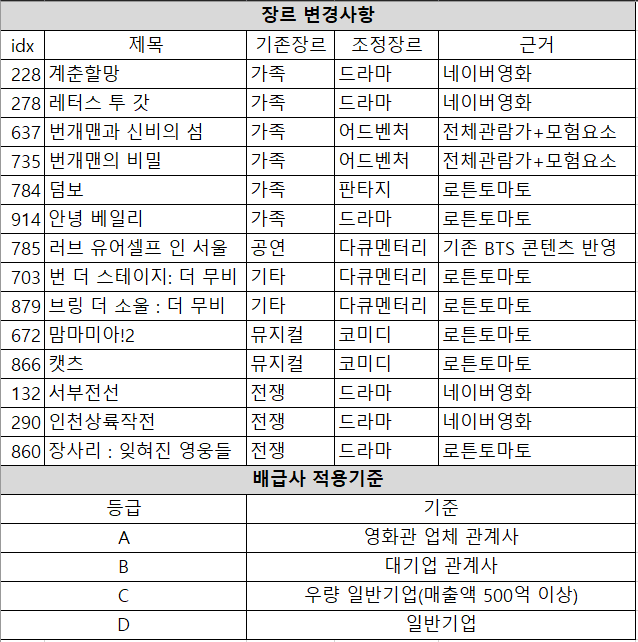

In [393]:
from IPython.display import Image
Image("distributor_criteria.PNG")

In [389]:
final_movie_ols[['aud_nationwide', 'screen', 'expert_rating', 'audience_rating', 'rating_audiences', 'running_times', 'director_power', 'actor_power']].describe()

aud_nationwide       screen  expert_rating  audience_rating  \
count    9.250000e+02   925.000000     925.000000       925.000000   
mean     1.099422e+06   615.031351       5.400735         8.166960   
std      2.009962e+06   419.167442       2.048343         1.492485   
min      3.186600e+04    28.000000       0.000000         0.000000   
25%      9.701700e+04   322.000000       5.000000         7.867150   
50%      2.860420e+05   512.000000       5.920000         8.457944   
75%      1.124815e+06   827.000000       6.700000         8.919948   
max      1.626336e+07  2835.000000       9.110000        10.000000   

       rating_audiences  running_times  director_power   actor_power  
count        925.000000     925.000000    9.250000e+02  9.250000e+02  
mean         673.470270     109.778378    3.755600e+06  8.945175e+07  
std         1386.145334      19.932613    1.252446e+07  1.498437e+08  
min            0.000000      48.000000    0.000000e+00  0.000000e+00  
25%           81.000000      97.000000    1.502150e+05  4.066096e+06  
50%          234.000000     110.000000    8.145870e+05  2.987306e+07  
75%          696.000000     122.000000    3.417629e+06  1.003499e+08  
max        24610.000000     222.000000    1.989550e+08  1.151033e+09

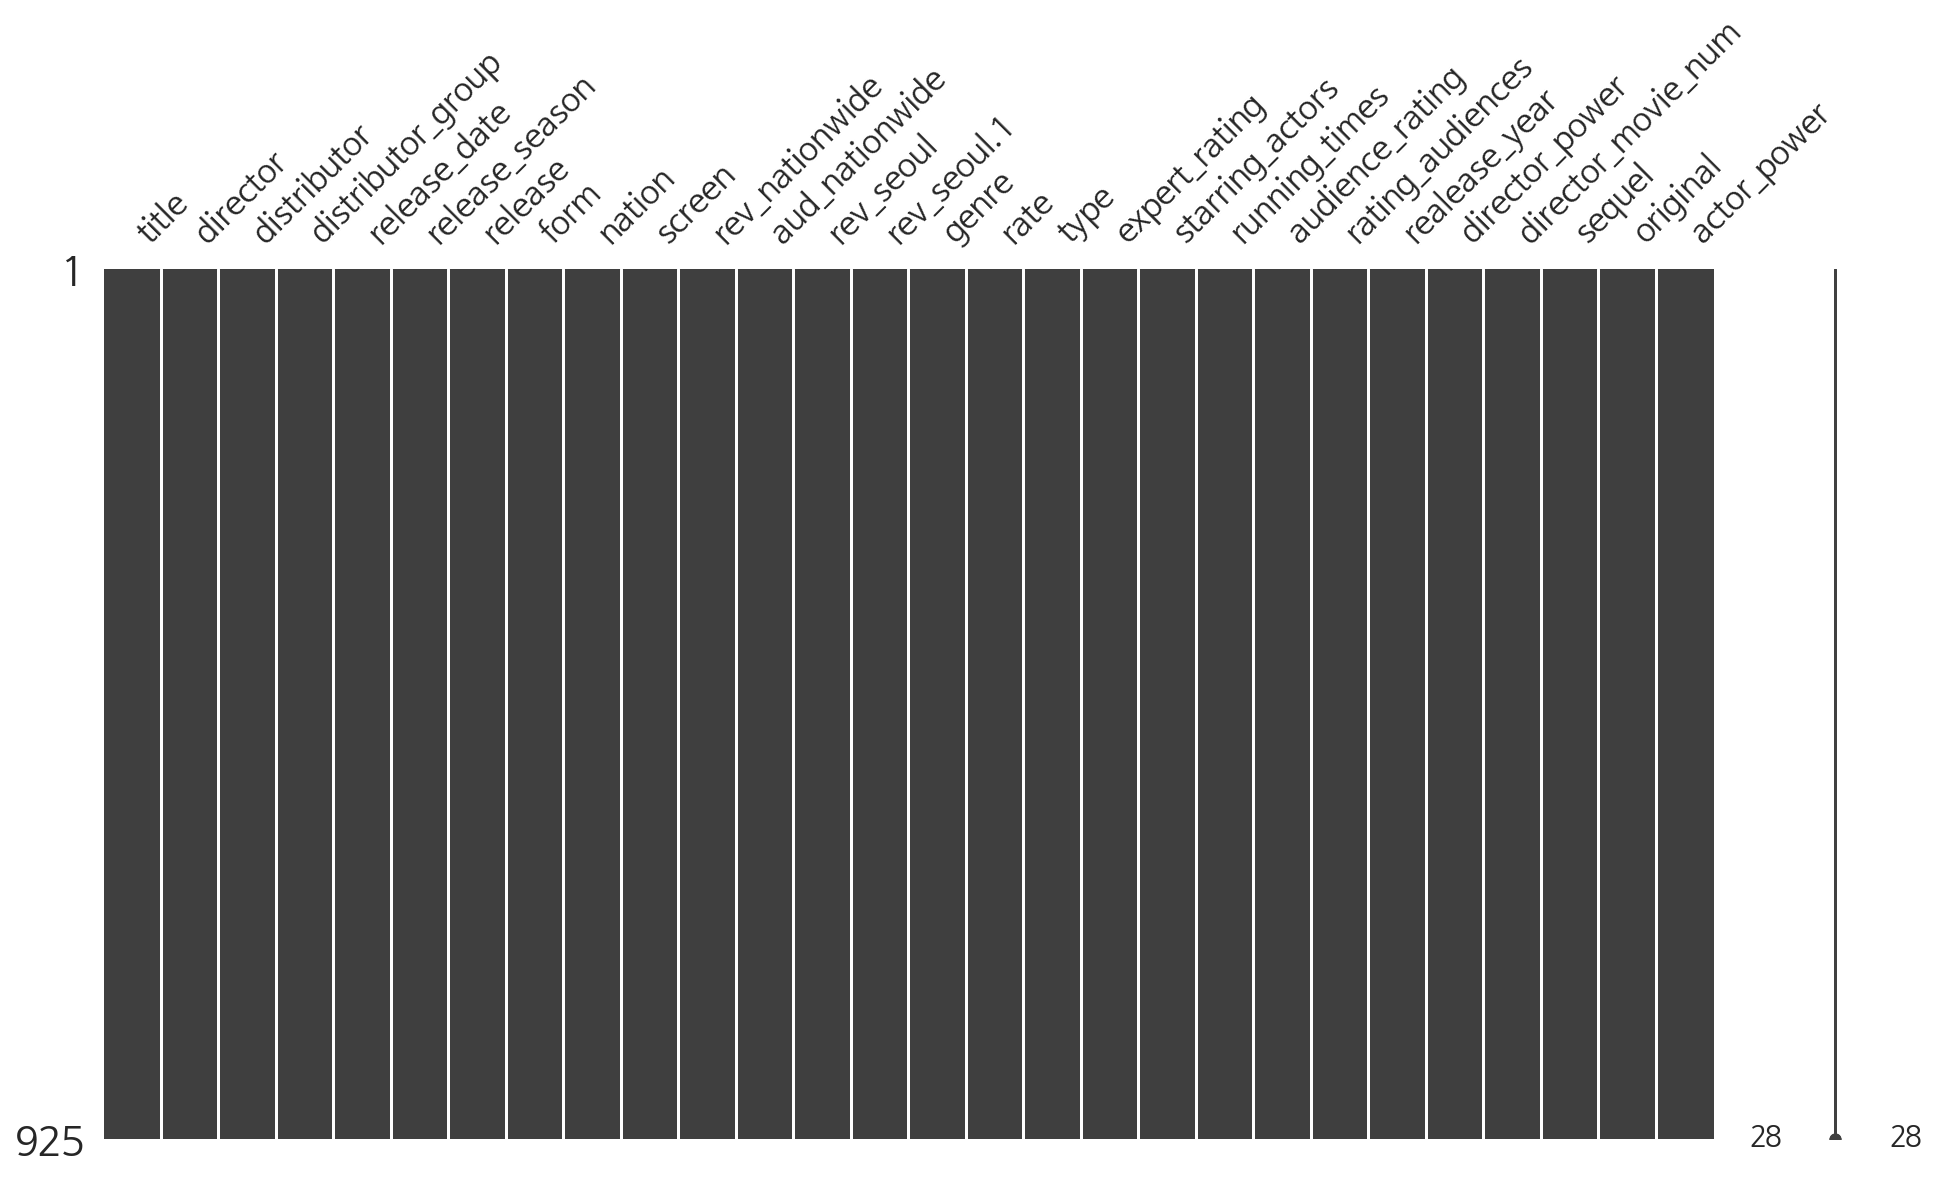

In [382]:
import missingno as msno
import matplotlib.pylab as plt

msno.matrix(final_movie_ols, figsize=(16, 8))
plt.show()

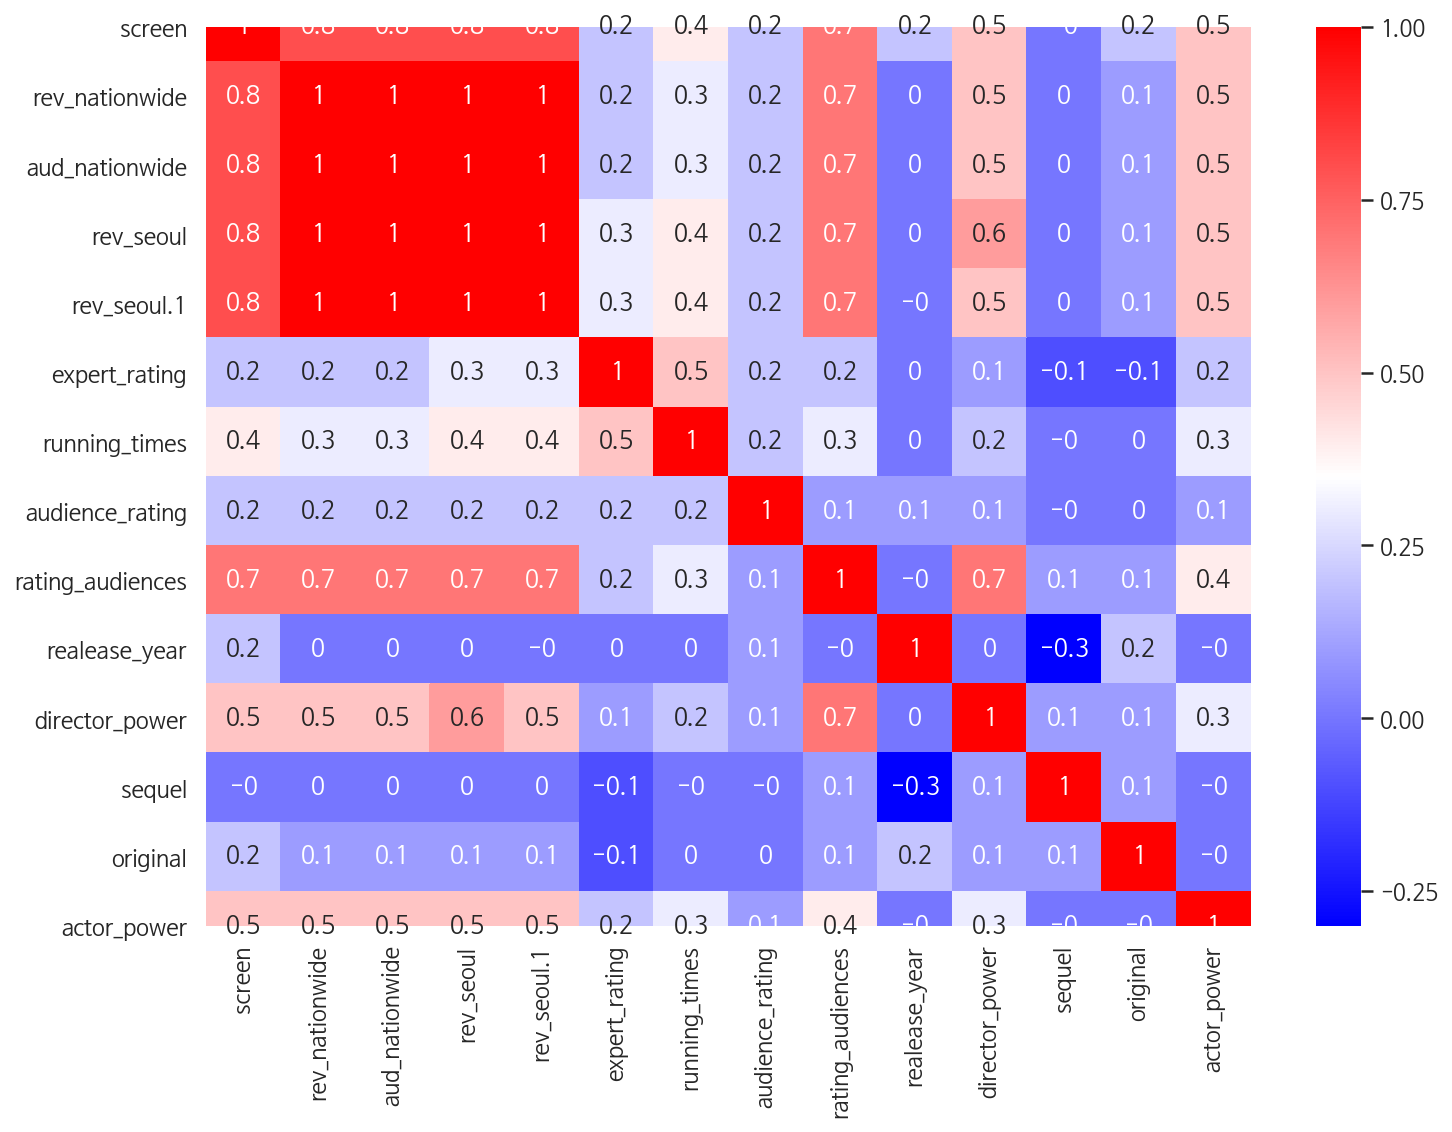

In [385]:
correlation_matrix = final_movie_ols.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

#### distributor_group 컬럼 살펴보기

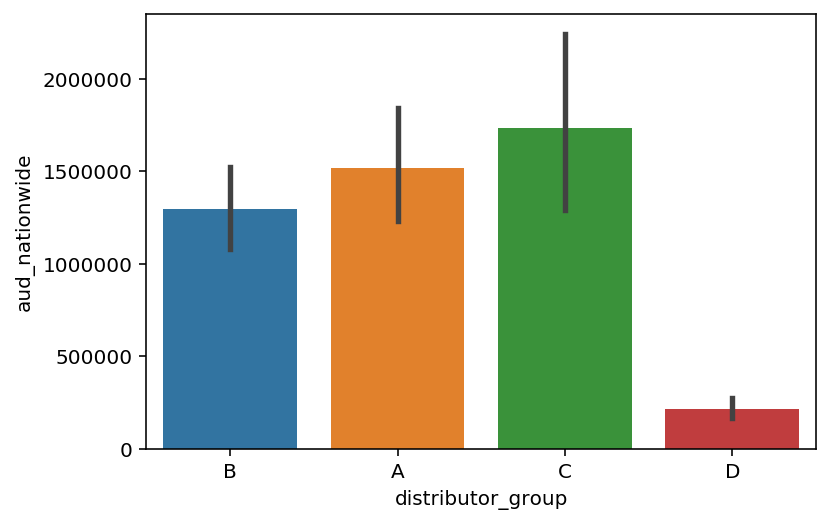

In [6]:
import seaborn as sns
sns.barplot(x=final_movie_ols["distributor_group"], y=final_movie_ols["aud_nationwide"])

In [7]:
domestic_major = final_movie_ols[final_movie_ols['distributor_group'] == 'A']
hollywood = final_movie_ols[final_movie_ols['distributor_group'] == 'B']
domestic_minor = final_movie_ols[final_movie_ols['distributor_group'] == 'C']
domestic_indi = final_movie_ols[final_movie_ols['distributor_group'] == 'D']

In [8]:
domestic_major["distributor"].unique()

array(['씨제이이앤엠(주)', '메가박스중앙(주)플러스엠', 'CGV아트하우스', '롯데쇼핑㈜롯데엔터테인먼트',
       'CGV아트하우스,(주)대명문화공장', '롯데쇼핑㈜롯데엔터테인먼트,(주)마인스 엔터테인먼트',
       'CGV아트하우스,(주)리틀빅픽쳐스', 'CGV아트하우스,영화사 풀', '메가박스중앙(주)플러스엠,(주)키위미디어그룹',
       '롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스', '메가박스중앙(주)플러스엠,주식회사 키위컴퍼니',
       '씨제이 씨지브이(CJ CGV)(주)', '롯데컬처웍스(주)롯데엔터테인먼트',
       '롯데컬처웍스(주)롯데엔터테인먼트,씨네그루(주)키다리이엔티', '메가박스중앙(주)플러스엠,(주)콘텐츠 난다긴다',
       '씨제이이앤엠(주),(주)덱스터스튜디오'], dtype=object)

In [9]:
hollywood["distributor"].unique()

array(['월트디즈니컴퍼니코리아(주)', '이십세기폭스코리아(주)', '유니버설픽쳐스인터내셔널 코리아(유)',
       '워너브러더스 코리아(주)', '씨네그루(주)다우기술', '(주)이수C&E', '(주)티캐스트',
       '씨네그루(주)키다리이엔티', '월트디즈니컴퍼니코리아 유한책임회사', '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점',
       '(주)이수C&E,(주)스톰픽쳐스코리아', '씨네그루(주)키다리이엔티,주식회사 키위컴퍼니',
       '(주)이수C&E,(주)에이원엔터테인먼트', '씨네그루(주)키다리이엔티,(주)삼백상회',
       '(주)이수C&E,(주)시너지미디어', '(주)셀트리온엔터테인먼트', '케이티하이텔(주)'], dtype=object)

In [10]:
domestic_minor['distributor'].unique()

array(['(주)쇼박스', '(주)넥스트엔터테인먼트월드(NEW)', '(주)쇼박스,(주)와우픽쳐스', '(주)아이코닉스',
       '(재)CBS,(주)영화사 안다미로', '(재)CBS', '(주)홈초이스', '(주)애니플러스',
       '(재)CBS,주식회사 마운틴픽쳐스', '(주)넥스트엔터테인먼트월드(NEW),(주)팬엔터테인먼트'],
      dtype=object)

In [11]:
len(domestic_indi['distributor'].unique())

97

- A(domestic_major) : 씨제이이엔엠, 메가박스중앙, CGV 아트하우스, 롯데 외 관련 합작사
- B(hollywood) : 월트디즈니, 이십세기폭스, 유니버설픽쳐스, 워너브러더스 코리아, 씨네그루, 이수C&E, 티캐스트, 소니픽쳐스, 스톰픽쳐코리아, 키위컴퍼니, 에이원엔터테이먼트, 셀트리온엔터테인먼트, (케이티하이텔_1건)
- C(domestic_minor) : 쇼박스, 넥스트엔터테인먼트(NEW), 아이코닉스, CBS, 홈초이스, 애니플러스, 마운틴픽쳐스
- D(domestic_indi) : 그 외 소규모 영화사

In [12]:
work_countA = len(final_movie_ols[final_movie_ols['distributor_group'] == 'A'])
work_countB = len(final_movie_ols[final_movie_ols['distributor_group'] == 'B'])
work_countC = len(final_movie_ols[final_movie_ols['distributor_group'] == 'C'])
work_countD = len(final_movie_ols[final_movie_ols['distributor_group'] == 'D'])

print(work_countA, work_countB, work_countC, work_countD)

228 328 110 259


In [13]:
avg_aud_bydistributorA = sum(domestic_major['aud_nationwide']) / len(domestic_major['distributor_group'])
avg_aud_bydistributorB = sum(hollywood['aud_nationwide']) / len(hollywood['distributor_group'])
avg_aud_bydistributorC = sum(domestic_minor['aud_nationwide']) / len(domestic_minor['distributor_group'])
avg_aud_bydistributorD = sum(domestic_indi['aud_nationwide']) / len(domestic_indi['distributor_group'])

print(avg_aud_bydistributorA, avg_aud_bydistributorB, avg_aud_bydistributorC, avg_aud_bydistributorD)

1519509.75 1295823.25 1732666.6454545455 211944.43243243243


- 배급사 등급별 평균 전국관객수: C(domestic_minor) > A(domestic_major > C(hollywood) D(domestic_indi) 

#### sequel, original 컬럼 살펴보기

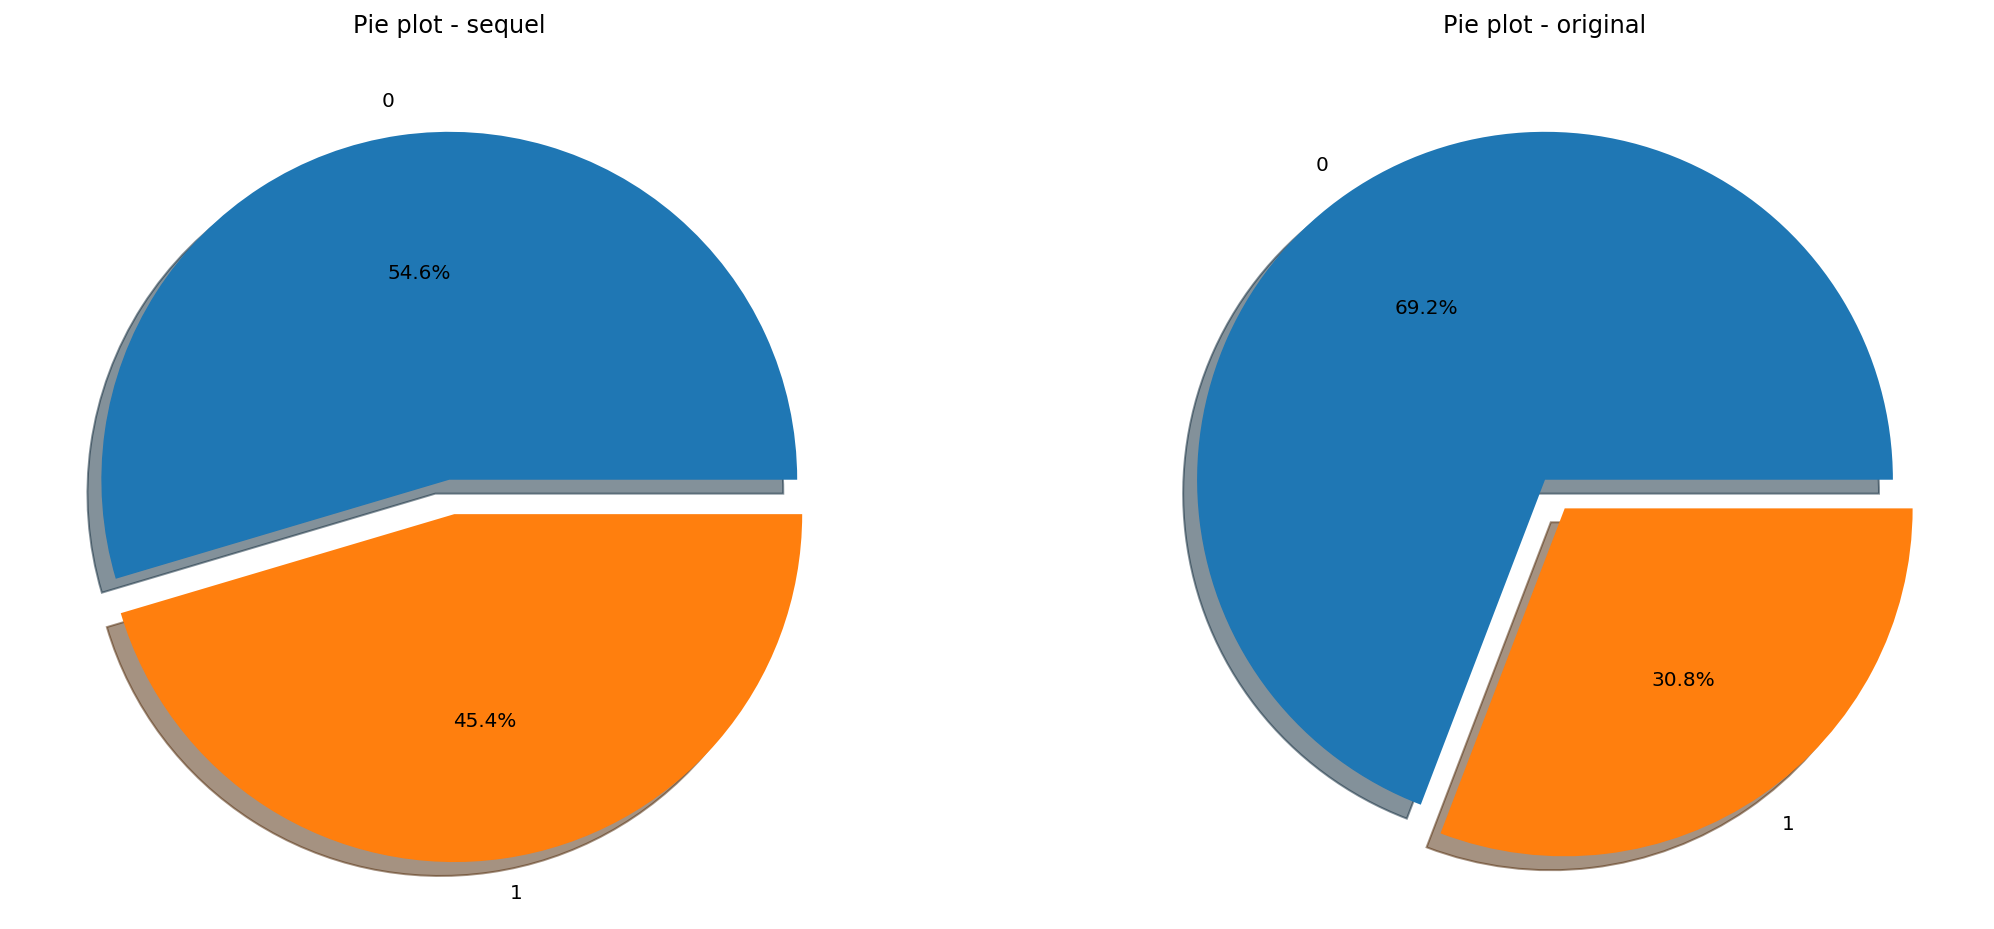

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, 2, figsize=(18, 8))

final_movie_ols['sequel'].value_counts().plot.pie(explode=[0, 0.1],
                                                  autopct='%1.1f%%', ax=ax[0], shadow=True)
final_movie_ols['original'].value_counts().plot.pie(explode=[0, 0.1],
                                                   autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('Pie plot - sequel')
ax[0].set_ylabel('')
ax[1].set_title('Pie plot - original')
ax[1].set_ylabel('')

plt.show()

- BoxOffice 100위 안에 들기 위해서는 original 보다는 sequel일 때 영향이 높음

#### nation 컬럼 살펴보기

In [20]:
from matplotlib import rc
import matplotlib as mpl

# matplotlib 한글 사용을 위한 코드
rc('font', family='AppleGothic')

# plt.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family='Hancom Gothic')
mpl.rc('axes', unicode_minus=False)

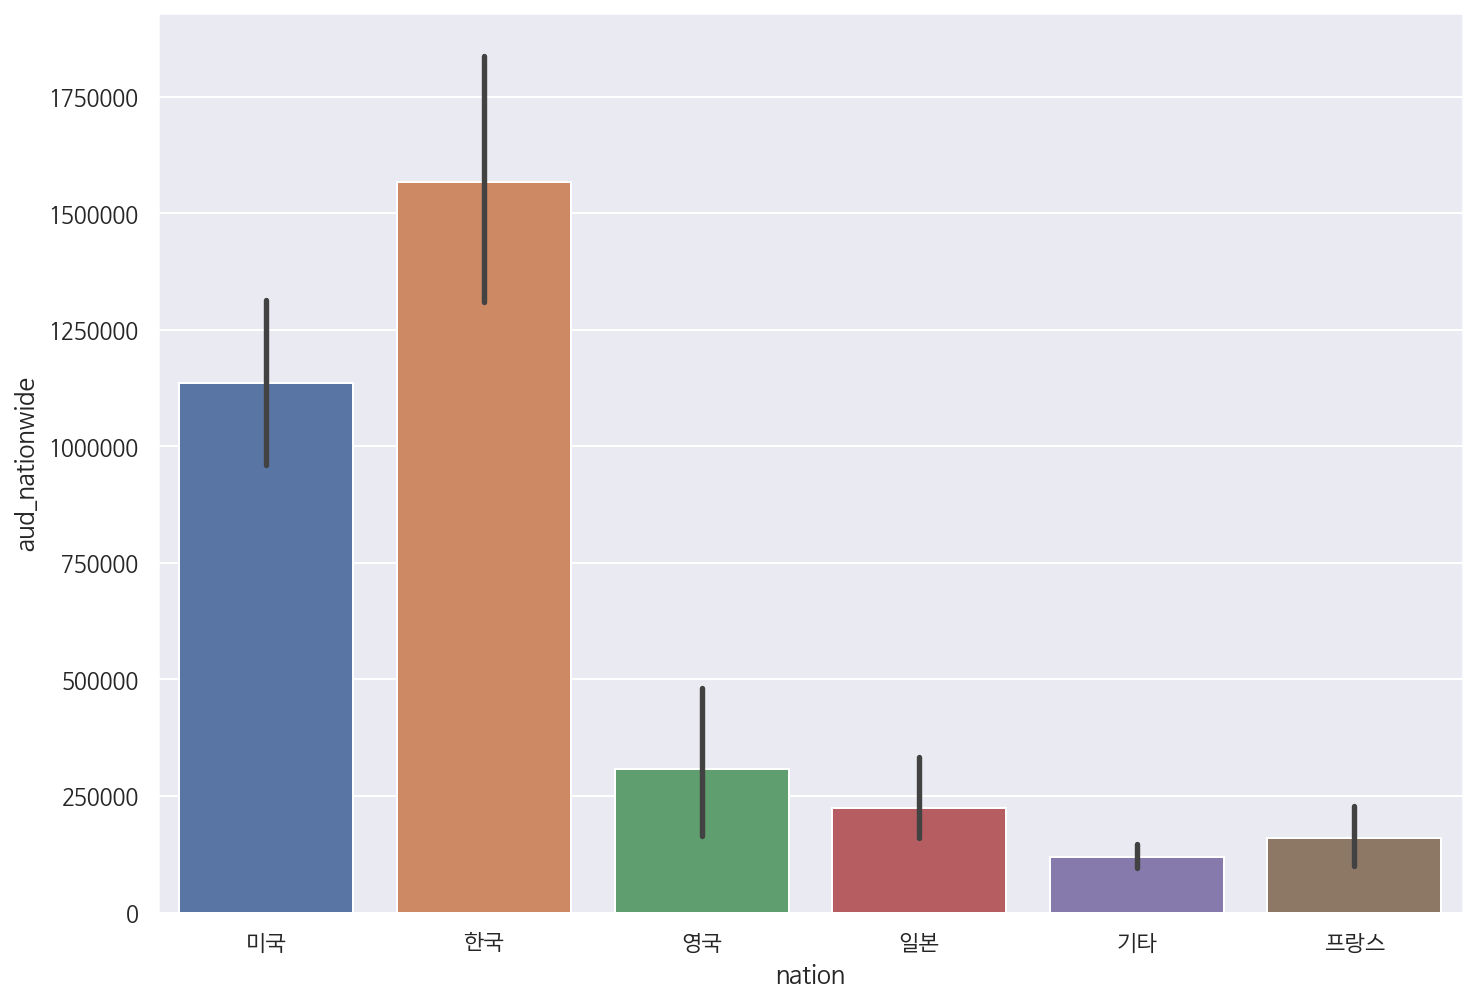

In [21]:
sns.barplot(x=final_movie_ols["nation"], y=final_movie_ols["aud_nationwide"])

#### genre 컬럼 살펴보기

In [19]:
from matplotlib import rc
import matplotlib as mpl


# plt.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family='Hancom Gothic')
# mpl.rc('axes', unicode_minus=False)
#sns.set(rc={'figure.figsize':(11.7, 8.27)})

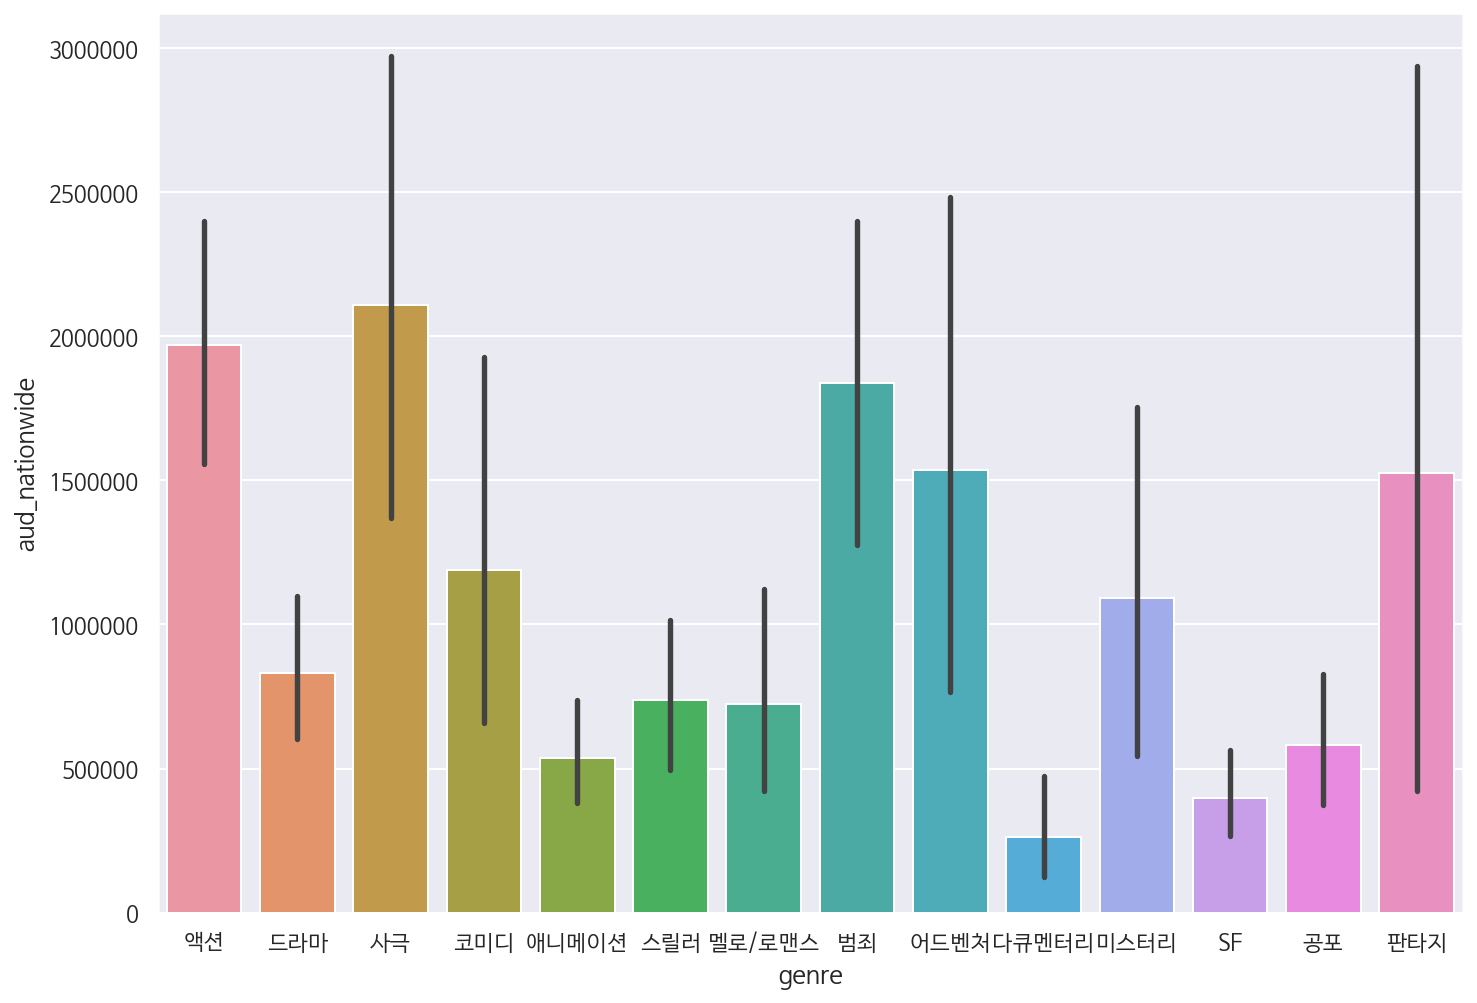

In [22]:
sns.barplot(x=final_movie_ols["genre"], y=final_movie_ols["aud_nationwide"])

### 선형회귀 분석 전 살펴보기

In [23]:
final_movie_ols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 28 columns):
title                 925 non-null object
director              925 non-null object
distributor           925 non-null object
distributor_group     925 non-null object
release_date          925 non-null object
release_season        925 non-null object
release               925 non-null object
form                  925 non-null object
nation                925 non-null object
screen                925 non-null int64
rev_nationwide        925 non-null float64
aud_nationwide        925 non-null int64
rev_seoul             925 non-null int64
rev_seoul.1           925 non-null int64
genre                 925 non-null object
rate                  925 non-null object
type                  925 non-null object
expert_rating         925 non-null float64
starring_actors       925 non-null object
running_times         925 non-null int64
audience_rating       925 non-null float64
rating_audience

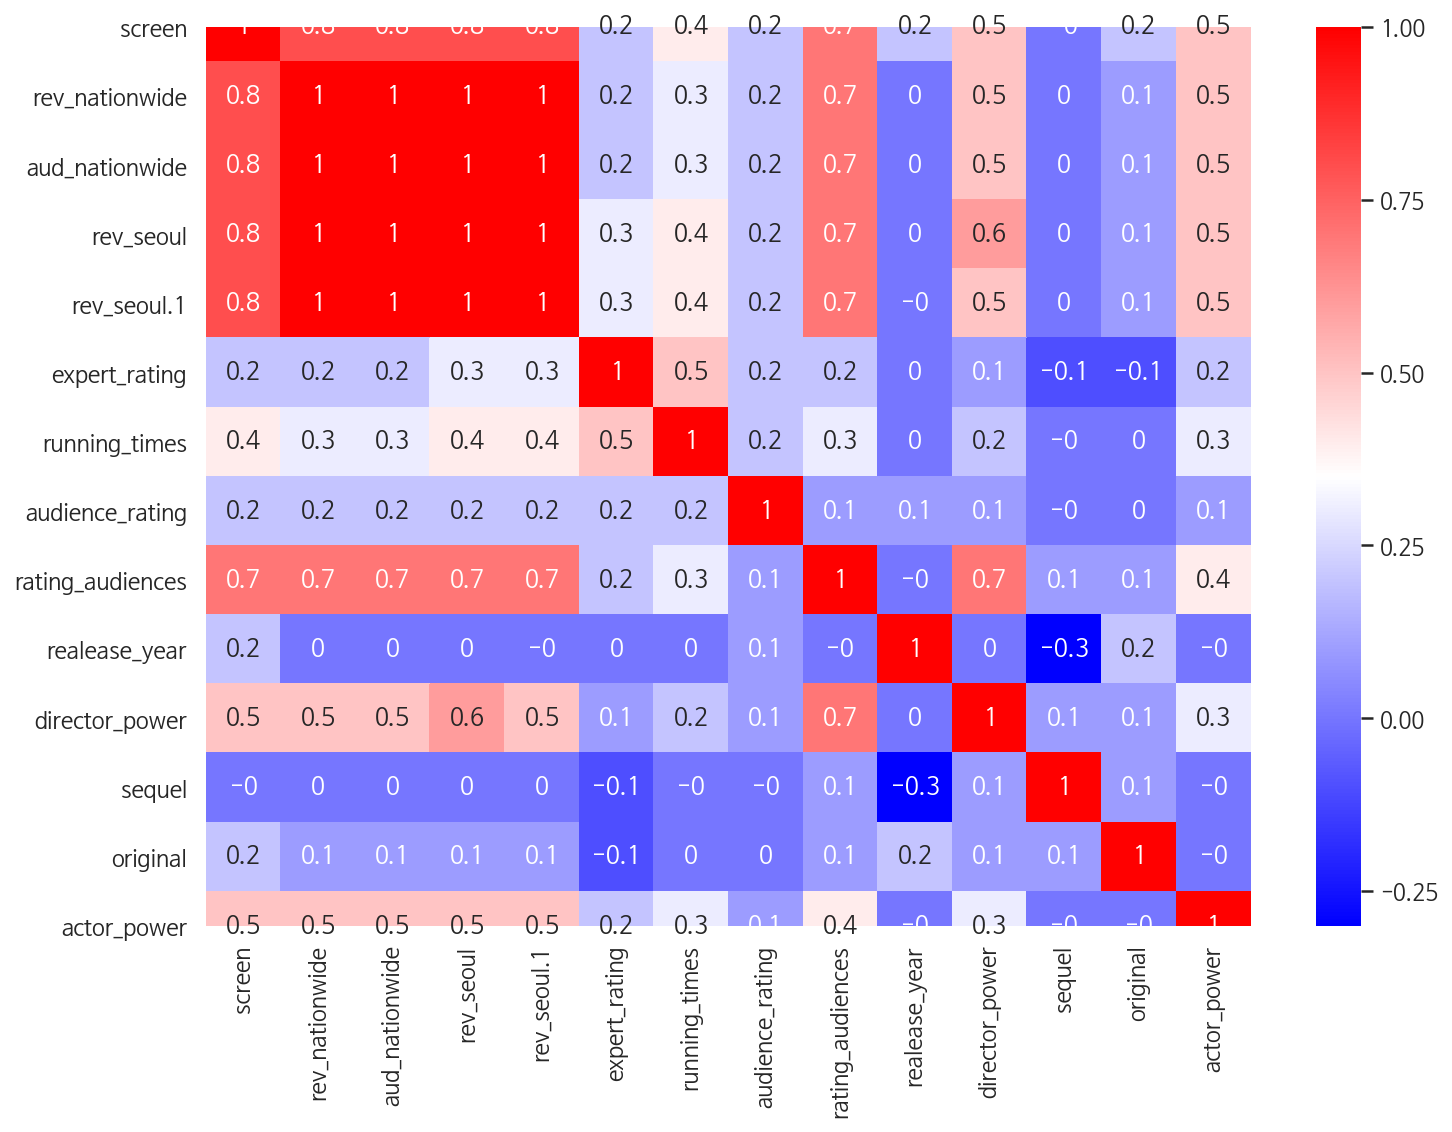

In [24]:
correlation_matrix = final_movie_ols.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

In [123]:
X_train = pd.read_csv("../X_train_08_1.csv")
y_train = pd.read_csv("../y_train_08_1.csv")
X_test = pd.read_csv("../X_test_08_1.csv")
y_test = pd.read_csv("../y_test_08_1.csv")

In [26]:
X_train = X_train.drop("Unnamed: 0", axis=1)
X_test = X_test.drop("Unnamed: 0", axis=1)
y_train = y_train.drop("Unnamed: 0", axis=1)
y_test = y_test.drop("Unnamed: 0", axis=1)

In [27]:
X_train.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'release', 'form', 'nation', 'screen',
       'rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'genre', 'rate', 'type',
       'expert_rating', 'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'realease_year', 'director_power',
       'director_movie_num', 'sequel', 'original', 'actor_power'],
      dtype='object')

In [28]:
import statsmodels.api as sm

### OLS

#### model0 : ovefitting

In [34]:
model0 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + 0", data=X_train)
result0 = model0.fit()
print(result0.summary())

                                 OLS Regression Results                                
Dep. Variable:                y_train   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              392.9
Date:                Tue, 31 Mar 2020   Prob (F-statistic):                   3.50e-243
Time:                        13:59:13   Log-Likelihood:                         -11317.
No. Observations:                 740   AIC:                                  2.265e+04
Df Residuals:                     733   BIC:                                  2.268e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [235]:
result0.params

screen               2341.769429
expert_rating       42210.146385
running_times       -9782.794746
audience_rating        91.078907
rating_audiences      461.136004
director_power          0.006865
actor_power             0.002298
dtype: float64

In [35]:
pred0 =  result0.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power"]])
rss0 = ((y_test.aud_nationwide - pred0) ** 2).sum()
tss0 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared0 = 1 - rss0/tss0
rsquared0

0.6871643201709314

Text(0.5, 1.0, 'aud_nationwide vs. Predicted_aud_nationwide')

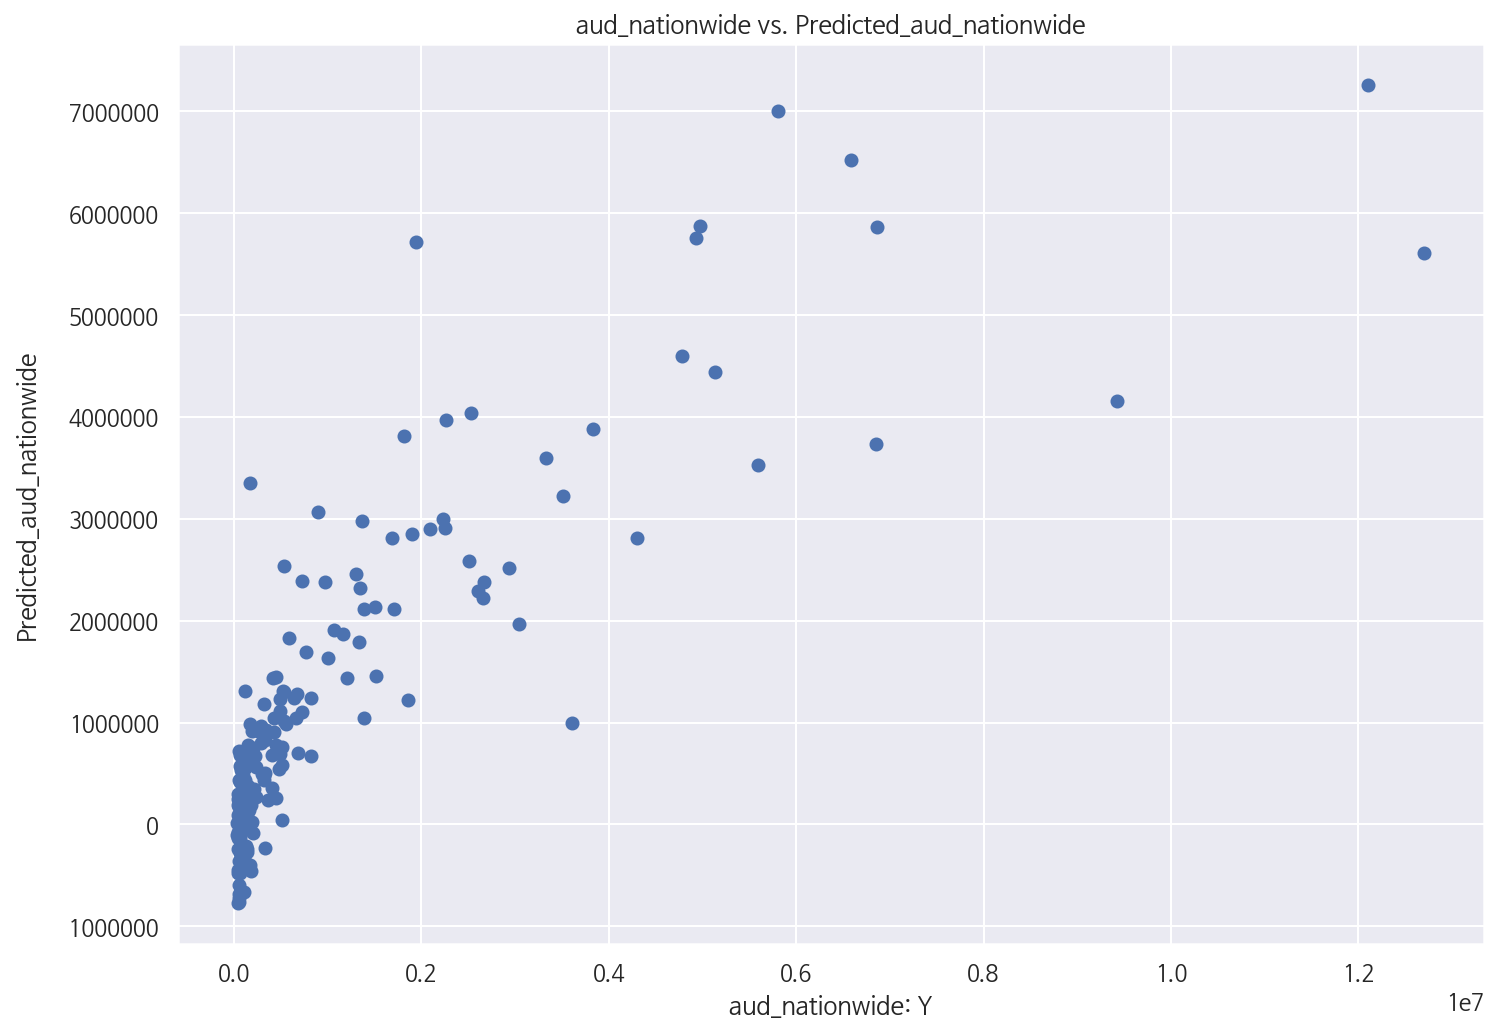

In [36]:

y_pred_test0 = result0.predict(X_test)

plt.scatter(y_test, y_pred_test0)
plt.xlabel("aud_nationwide: Y")
plt.ylabel("Predicted_aud_nationwide")
plt.title("aud_nationwide vs. Predicted_aud_nationwide")

In [37]:
from sklearn.metrics import mean_squared_error as mse

In [38]:
mse = mse(y_test, y_pred_test0)
print(mse)

1176780786336.5618


#### model1 : rate 컬럼은 예측에 마이너스 영향

In [39]:
model1 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + C(rate)", data=X_train)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     198.9
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          1.09e-200
Time:                        13:59:47   Log-Likelihood:                -11309.
No. Observations:                 740   AIC:                         2.264e+04
Df Residuals:                     729   BIC:                         2.269e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.313e+06   3

In [40]:
pred1 =  result1.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "rate"]])
rss1 = ((y_test.aud_nationwide - pred1) ** 2).sum()
tss1 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared1 = 1 - rss1/tss1
rsquared1

0.6825923590668053

#### model2 : genre 컬럼은 예측에 적지만 긍정적 영향

In [41]:
model2 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + C(genre)", data=X_train)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          2.00e-193
Time:                        14:00:03   Log-Likelihood:                -11300.
No. Observations:                 740   AIC:                         2.264e+04
Df Residuals:                     719   BIC:                         2.274e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.549e+06   4.34

In [42]:
pred2 =  result2.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre"]])
rss2 = ((y_test.aud_nationwide - pred2) ** 2).sum()
tss2 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared2 = 1 - rss2/tss2
rsquared2

0.6874924820928625

Text(0.5, 1.0, 'aud_nationwide vs. Predicted_aud_nationwide')

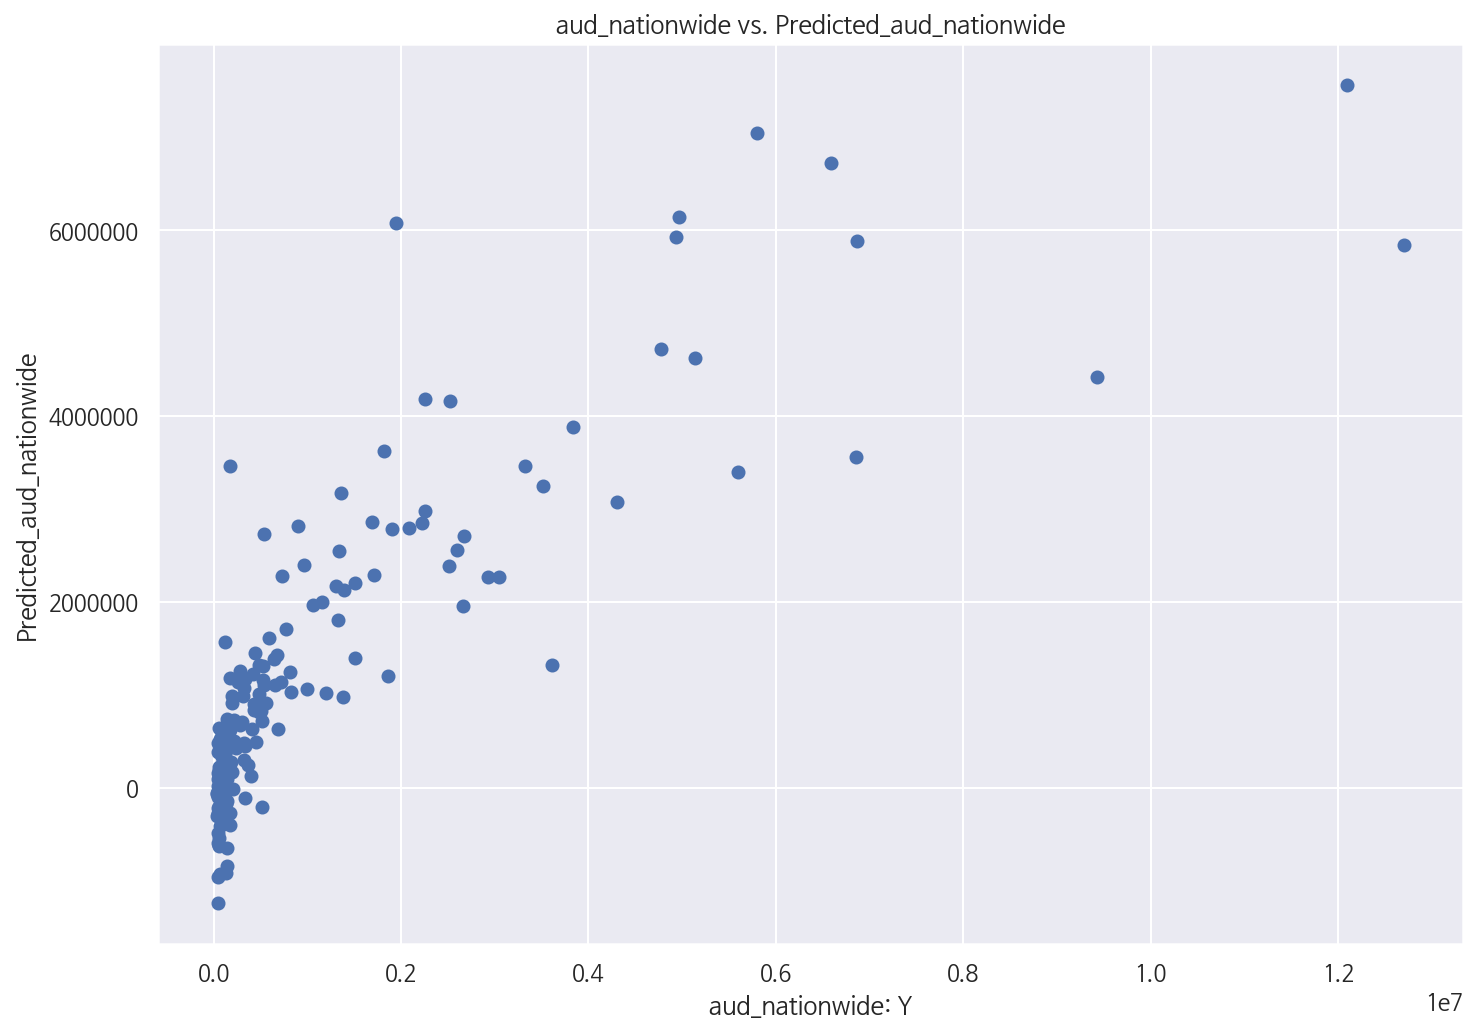

In [252]:

y_pred_test2 = result2.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre"]])

plt.scatter(y_test, y_pred_test2)
plt.xlabel("aud_nationwide: Y")
plt.ylabel("Predicted_aud_nationwide")
plt.title("aud_nationwide vs. Predicted_aud_nationwide")

In [254]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(y_test, y_pred_test2)
print(mse)

1175546353471.5293


#### model3 : genre, nation 추가 0.004 상승

In [43]:
model3 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + C(genre) + C(nation)", data=X_train)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     82.15
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          5.72e-191
Time:                        14:00:20   Log-Likelihood:                -11294.
No. Observations:                 740   AIC:                         2.264e+04
Df Residuals:                     714   BIC:                         2.276e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.173e+06   4.58

In [44]:
pred3 =  result3.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation"]])
rss3 = ((y_test.aud_nationwide - pred3) ** 2).sum()
tss3 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared3 = 1 - rss3/tss3
rsquared3

0.6881464180826496

#### model4 : overfitting

In [45]:
model4 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + C(genre) + C(nation) + C(distributor_group)", data=X_train)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     74.38
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          3.53e-190
Time:                        14:00:38   Log-Likelihood:                -11289.
No. Observations:                 740   AIC:                         2.264e+04
Df Residuals:                     711   BIC:                         2.277e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [46]:
pred4 =  result4.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "distributor_group"]])
rss4 = ((y_test.aud_nationwide - pred4) ** 2).sum()
tss4 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared4 = 1 - rss4/tss4
rsquared4

0.6814641998612958

#### model5 : sequel 여부는 예측에 마이너스, original 여부가 예측에 플러스 요소!

In [99]:
model5 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + C(genre) + C(nation) + C(original)", data=X_train)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     79.92
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          1.67e-191
Time:                        17:59:09   Log-Likelihood:                -11291.
No. Observations:                 740   AIC:                         2.264e+04
Df Residuals:                     713   BIC:                         2.276e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.193e+06   4.56

In [48]:
pred5 =  result5.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "distributor_group", "original"]])
rss5 = ((y_test.aud_nationwide - pred5) ** 2).sum()
tss5 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared5 = 1 - rss5/tss5
rsquared5

0.6961527279644137

#### model6 : release_season 컬럼 추가, overfitting

In [96]:
model6 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + C(genre) + C(nation) + C(original) + C(release_season)"
    , data=X_train)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     71.97
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          1.22e-189
Time:                        15:25:29   Log-Likelihood:                -11288.
No. Observations:                 740   AIC:                         2.264e+04
Df Residuals:                     710   BIC:                         2.278e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [97]:
pred6 =  result6.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "distributor_group", "original", "release_season"]])
rss6 = ((y_test.aud_nationwide - pred6) ** 2).sum()
tss6 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared6 = 1 - rss6/tss6
rsquared6

0.695750718220844

In [60]:
print("model0_test_rss : {},\nmodel1_test_rss : {},\nmodel2_test_rss : {},\nmodel3_test_rss : {},\nmodel4_test_rss : {},\nmodel5_test_rss : {},\nmodel6_test_rss : {}".format(rsquared0, rsquared1, rsquared2, rsquared3, rsquared4, rsquared5, rsquared6))

model0_test_rss : 0.6871643201709314,
model1_test_rss : 0.6825923590668053,
model2_test_rss : 0.6874924820928625,
model3_test_rss : 0.6881464180826496,
model4_test_rss : 0.6814641998612958,
model5_test_rss : 0.6961527279644137,
model6_test_rss : 0.695750718220844


### 6.4 다중공선성과 변수 선택

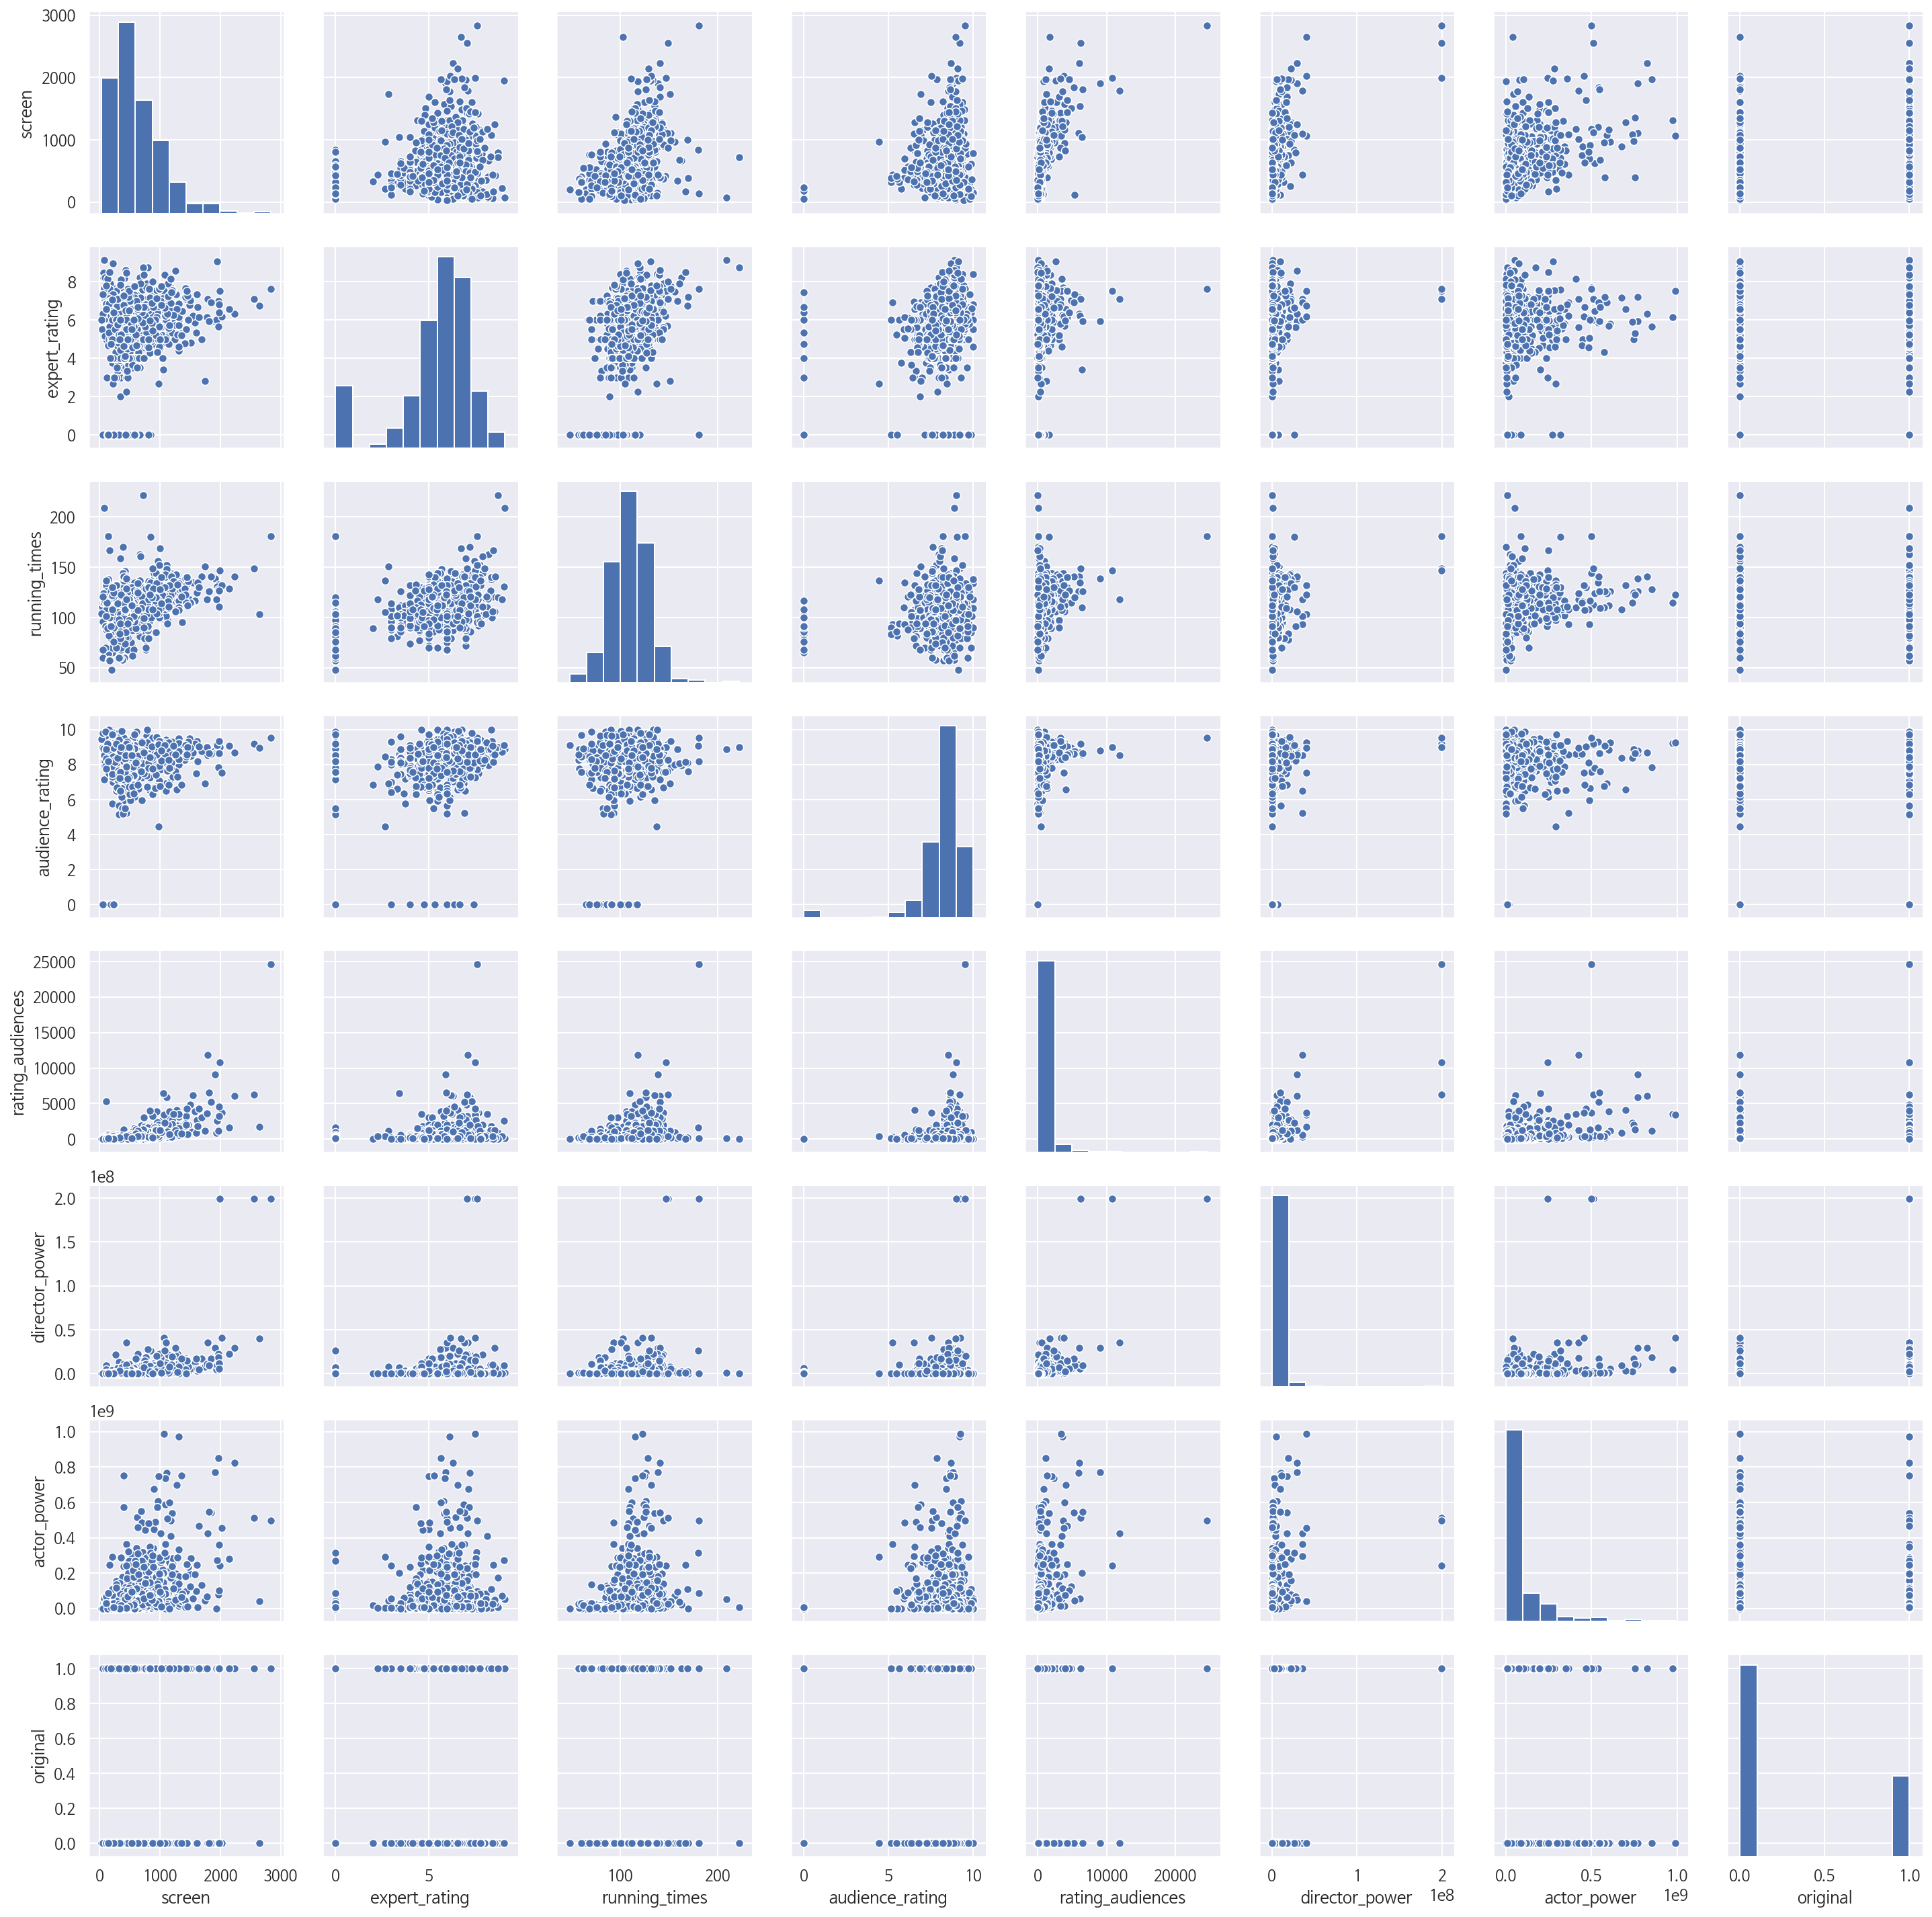

In [62]:
sns.pairplot(X_train[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "distributor_group", "original"]])
plt.show()

In [52]:
X_train[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "distributor_group", "original"]].corr()

screen  expert_rating  running_times  audience_rating  \
screen            1.000000       0.235805       0.386307         0.140668   
expert_rating     0.235805       1.000000       0.472335         0.167430   
running_times     0.386307       0.472335       1.000000         0.170664   
audience_rating   0.140668       0.167430       0.170664         1.000000   
rating_audiences  0.644912       0.174849       0.294560         0.136389   
director_power    0.483497       0.135809       0.237750         0.076506   
actor_power       0.490809       0.158509       0.279620         0.036042   
original          0.218377      -0.078213       0.038616         0.067766   

                  rating_audiences  director_power  actor_power  original  
screen                    0.644912        0.483497     0.490809  0.218377  
expert_rating             0.174849        0.135809     0.158509 -0.078213  
running_times             0.294560        0.237750     0.279620  0.038616  
audience_rating           0.136389        0.076506     0.036042  0.067766  
rating_audiences          1.000000        0.694082     0.437997  0.139222  
director_power            0.694082        1.000000     0.288366  0.145928  
actor_power               0.437997        0.288366     1.000000 -0.030254  
original                  0.139222        0.145928    -0.030254  1.000000

#### model7 : VIF(Variance Inflation Faction) 적용, 다중공선성 제거 : train, test 간 간극 줄임

In [74]:
X_train_columns = X_train[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power"]]

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_columns.values, i) for i in range(X_train_columns.shape[1])]
vif["features"] = X_train_columns.columns
vif

VIF Factor          features
0    6.315953            screen
1   10.486589     expert_rating
2   30.537759     running_times
3   20.998310   audience_rating
4    3.167736  rating_audiences
5    2.110445    director_power
6    1.900397       actor_power

In [251]:
df_train0["aud_nationwide"] = df_train0["aud_nationwide"].apply(lambda data : np.log(data))

In [108]:
np.exp(df_train0["aud_nationwide"])

0      15.418666
1      10.948453
2      13.427037
3      10.899402
4      14.925080
         ...    
735    11.828116
736    13.933505
737    14.132739
738    12.221183
739    11.446080
Name: aud_nationwide, Length: 740, dtype: float64

In [112]:
df_train0["aud_nationwide"]

0      15.418666
1      10.948453
2      13.427037
3      10.899402
4      14.925080
         ...    
735    11.828116
736    13.933505
737    14.132739
738    12.221183
739    11.446080
Name: aud_nationwide, Length: 740, dtype: float64

In [113]:
model7 = sm.OLS.from_formula("aud_nationwide ~ scale(actor_power) + scale(director_power) + scale(rating_audiences) + scale(screen) + C(genre) + C(nation) + C(original) +0", data=df_train0)
result7 = model7.fit()
print(result7.summary())


                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     96.13
Date:                Wed, 01 Apr 2020   Prob (F-statistic):          4.13e-201
Time:                        11:21:59   Log-Likelihood:                -826.58
No. Observations:                 740   AIC:                             1701.
Df Residuals:                     716   BIC:                             1812.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(genre)[SF]              

In [88]:
y_train["aud_nationwide"]

0      4968687
1        56866
2       678091
3        54144
4      3033052
        ...   
735     137052
736    1125238
737    1373316
738     203045
739      93534
Name: aud_nationwide, Length: 740, dtype: int64

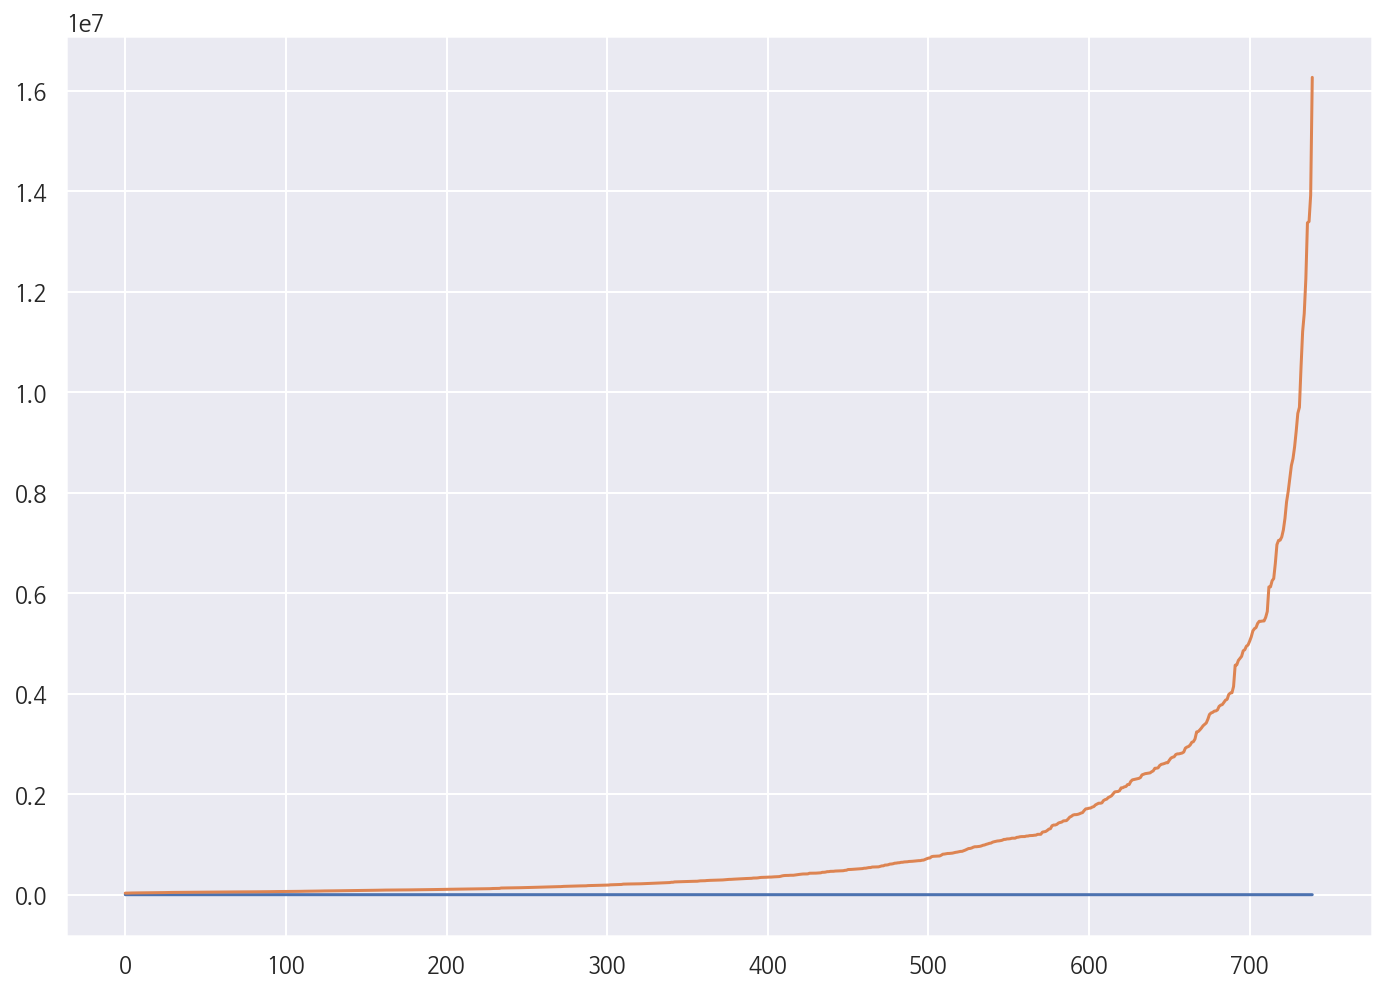

In [130]:
plt.plot(y_train.sort_values(["aud_nationwide"]).reset_index(drop = True))

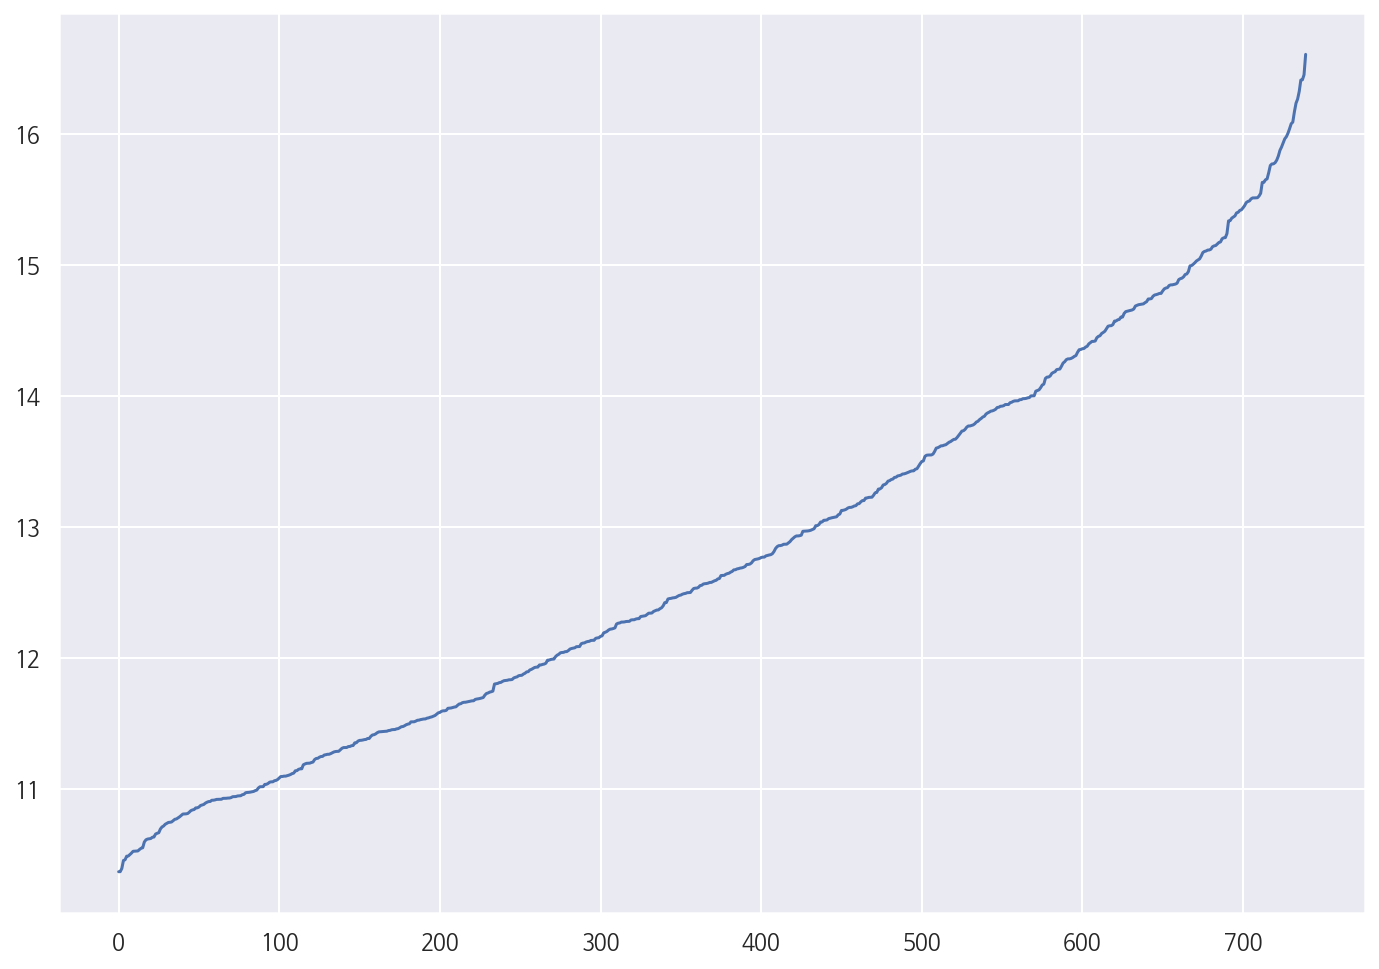

In [91]:
plt.plot(np.log(y_train.sort_values(["aud_nationwide"]).reset_index(drop = True)))

In [125]:
y_test["aud_nationwide"] = y_test["aud_nationwide"].apply(lambda data : np.log(data))

In [126]:
y_test["aud_nationwide"]

0      14.456375
1      10.551036
2      14.798544
3      12.961723
4      11.423329
         ...    
180    14.551465
181    13.176812
182    12.558843
183    11.267702
184    13.707422
Name: aud_nationwide, Length: 185, dtype: float64

In [127]:
pred7 =  result7.predict(X_test[["screen", "audience_rating", "rating_audiences", "director_power","actor_power", "genre", "nation", "original"]])
rss7 = ((y_test.aud_nationwide - pred7) ** 2).sum()
tss7 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared7 = 1 - rss7/tss7
rsquared7

0.7342188102066098

#### model8  : I(expert_rating * audience_rating)

In [136]:
from patsy import dmatrix

In [137]:
dmatrix("expert_rating + audience_rating + I(expert_rating * audience_rating) + 0", X_train)

DesignMatrix with shape (740, 3)
  expert_rating  audience_rating  I(expert_rating * audience_rating)
           7.88          9.11301                            71.81049
           0.00          8.45161                             0.00000
           6.00          8.85965                            53.15789
           5.00          9.63636                            48.18182
           7.33          9.34631                            68.50847
           5.63          8.56873                            48.24198
           0.00          8.39394                             0.00000
           4.67          8.14200                            38.02314
           2.00          6.85938                            13.71875
           6.03          8.55072                            51.56087
           5.17          8.19272                            42.35636
           7.20          7.62500                            54.90000
           0.00          8.74074                             0.00000
 

In [143]:
model8 = sm.OLS.from_formula("aud_nationwide ~ scale(actor_power) + scale(director_power) + scale(rating_audiences) + scale(screen) + I(director_power * audience_rating) + scale(running_times) + C(genre) + C(nation) + C(original)", data=df_train0)
result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     93.90
Date:                Wed, 01 Apr 2020   Prob (F-statistic):          1.90e-206
Time:                        11:44:01   Log-Likelihood:                -808.93
No. Observations:                 740   AIC:                             1670.
Df Residuals:                     714   BIC:                             1790.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [144]:
pred8 =  result8.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "original"]])
rss8 = ((y_test.aud_nationwide - pred8) ** 2).sum()
tss8 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared8 = 1 - rss8/tss8
rsquared8

0.7346396390254033

In [ ]:
#### model8_2 

In [152]:
df_train0.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'release', 'form', 'nation', 'screen',
       'rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'genre', 'rate', 'type',
       'expert_rating', 'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'realease_year', 'director_power',
       'director_movie_num', 'sequel', 'original', 'actor_power',
       'aud_nationwide'],
      dtype='object')

In [191]:
model8_2 = sm.OLS.from_formula("aud_nationwide ~ scale(actor_power) + scale(director_power) + scale(rating_audiences) + scale(screen) + genre * director_power + screen * rate + scale(running_times)  + C(nation) + C(original)  + C(release_season) + C(distributor_group)", data=df_train0)
result8_2 = model8_2.fit()
print(result8_2.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     53.95
Date:                Wed, 01 Apr 2020   Prob (F-statistic):          3.42e-202
Time:                        13:46:17   Log-Likelihood:                -764.78
No. Observations:                 740   AIC:                             1630.
Df Residuals:                     690   BIC:                             1860.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [195]:
from sklearn.model_selection import KFold
scores = np.zeros(5)
ls_ols = []
cv = KFold(5, shuffle = True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_train0)):
    df_train = df_train0.iloc[idx_train]
    df_test = df_train0.iloc[idx_test]
    
    model8_3 = sm.OLS.from_formula("aud_nationwide ~ scale(actor_power) + scale(director_power) + scale(rating_audiences) + scale(screen) + scale(expert_rating) + scale(audience_rating) + scale(running_times) + C(genre) + C(nation) + C(original) + genre * director_power + screen * rate + C(release_season) + C(distributor_group)", data=df_train0)
    result8_3 = model8_3.fit()
    
    pred8_3 = result8_3.predict(df_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "original", "rate", "release_season", "distributor_group"]])
    rss8_3 = ((df_test.aud_nationwide - pred8_3) ** 2).sum()
    tss8_3 = ((df_test.aud_nationwide - df_test.aud_nationwide.mean())** 2).sum()
    rsquared8_3 = 1 - rss8_3 / tss8_3
    
    scores[i] = rsquared8_3
    print("학습 R2 = {:.8}, 검증 R2 = {:.8F}".format(result8_3.rsquared, rsquared8_3))
    ls_ols.append({
        "cv" : i,
        "train_r2" : result8_3.rsquared,
        "test_r2" : rsquared8_3,
        "model" : result8_3
    })
    
    

학습 R2 = 0.80119371, 검증 R2 = 0.80194608
학습 R2 = 0.80119371, 검증 R2 = 0.79639952
학습 R2 = 0.80119371, 검증 R2 = 0.80828620
학습 R2 = 0.80119371, 검증 R2 = 0.79223832
학습 R2 = 0.80119371, 검증 R2 = 0.79990733


In [192]:
pred8_2 =  result8_2.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "original", "rate", "release_season", "distributor_group"]])
rss8_2 = ((y_test.aud_nationwide - pred8_2) ** 2).sum()
tss8_2 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared8_2 = 1 - rss8_2/tss8_2
rsquared8_2

0.7605447372498801

In [196]:
pred8_3 =  result8_3.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "original", "rate", "release_season", "distributor_group"]])
rss8_3 = ((y_test.aud_nationwide - pred8_3) ** 2).sum()
tss8_3 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared8_3 = 1 - rss8_3/tss8_3
rsquared8_3

0.759145571939262

### outliner 처리

In [302]:
XX_train_df = df_train1[["director_power", "actor_power", "rating_audiences", "aud_nationwide"]]

In [303]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(XX_train_df)
MMS.fit(XX_train_df)

X_ss = SS.transform(XX_train_df)
X_mms = MMS.transform(XX_train_df)

In [304]:
X_ss_pd = pd.DataFrame(X_ss, columns=XX_train_df.columns)
X_mms_pd = pd.DataFrame(X_ss, columns=XX_train_df.columns)

In [318]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=X_mms_pd["director_power"], name='director_power'))
fig.add_trace(go.Box(y=X_mms_pd["actor_power"], name='actor_power'))
fig.add_trace(go.Box(y=X_mms_pd["rating_audiences"], name='rating_audiences'))
fig.add_trace(go.Box(y=X_mms_pd["aud_nationwide"], name='aud_nationwide'))

fig.show()

In [319]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=XX_train_df["director_power"], name='director_power'))
fig.add_trace(go.Box(y=XX_train_df["actor_power"], name='actor_power'))
fig.add_trace(go.Box(y=XX_train_df["rating_audiences"], name='rating_audiences'))
fig.add_trace(go.Box(y=XX_train_df["aud_nationwide"], name='aud_natiowide'))
fig.show()

In [354]:
df_train0 = pd.concat([X_train, y_train], axis=1, )
df_train0 = df_train0.drop("Unnamed: 0", axis=1)
df_train0 = df_train0.reset_index(drop=True)

In [355]:
df_train0

title  director         distributor  \
0                           인사이드 아웃     피트 닥터      월트디즈니컴퍼니코리아(주)   
1        바다 탐험대 옥토넛 시즌4: 아슬아슬 구조대작전    다라 오코넬          와이드 릴리즈(주)   
2             신비아파트: 금빛 도깨비와 비밀의 동굴       김병갑           씨제이이앤엠(주)   
3                                순종   김동민,이주훈  (재)CBS,(주)영화사 안다미로   
4                           인크레더블 2    브래드 버드  월트디즈니컴퍼니코리아 유한책임회사   
..                              ...       ...                 ...   
735  극장판 에그엔젤 코코밍: 푸르밍과 두근두근 코코밍 세계    닛타 노리오           씨제이이앤엠(주)   
736                             챔피언       김용완       워너브러더스 코리아(주)   
737                           브이아이피       박훈정       워너브러더스 코리아(주)   
738                      어쌔신: 더 비기닝  마이클 쿠에스타            (주)이수C&E   
739                             맥베스    저스틴 커젤             판씨네마(주)   

    distributor_group release_date release_season release form nation  screen  \
0                   B     7/9/2015         summer    개봉영화   장편     미국     777   
1                   D     6/2/2016         summer    개봉영화   장편     영국     162   
2                   A    7/25/2018         summer    개봉영화   장편     한국     762   
3                   C   11/17/2016         autumn    개봉영화   장편     한국     104   
4                   B    7/18/2018         summer    개봉영화   장편     미국    1605   
..                ...          ...            ...     ...  ...    ...     ...   
735                 A     9/7/2017         autumn    개봉영화   장편     일본     232   
736                 B     5/1/2018         spring    개봉영화   장편     한국     874   
737                 B    8/23/2017         summer    개봉영화   장편     한국     996   
738                 B    12/7/2017         winter    개봉영화   장편     미국     528   
739                 D    12/3/2015         winter    개봉영화   장편     영국     141   

     ...  running_times  audience_rating  rating_audiences realease_year  \
0    ...            102         9.113006               938          2015   
1    ...             68         8.451613               155          2016   
2    ...             68         8.859649               912          2018   
3    ...             88         9.636364                11          2016   
4    ...            125         9.346312              2671          2018   
..   ...            ...              ...               ...           ...   
735  ...             76         0.000000                 0          2017   
736  ...            108         7.765766               222          2018   
737  ...            128         6.778051              1221          2017   
738  ...            112         8.538961               154          2017   
739  ...            181         8.193182                88          2015   

    director_power director_movie_num  sequel original  actor_power  \
0        4968687.0              1 [1]       0        0     14906061   
1        1206342.0              5 [5]       1        1     26048880   
2         678091.0              1 [1]       1        1     13907061   
3         162432.0           2 [1, 1]       1        0            0   
4        3564540.0              2 [2]       1        0    245078391   
..             ...                ...     ...      ...          ...   
735       320490.0              2 [2]       1        0      7703055   
736            0.0              1 [1]       0        0    299700006   
737     12181628.0              3 [3]       0        0     95691878   
738       203045.0              1 [1]       1        0     93617013   
739       355913.0              2 [2]       1        0     86057651   

     aud_nationwide  
0           4968687  
1             56866  
2            678091  
3             54144  
4           3033052  
..              ...  
735          137052  
736         1125238  
737         1373316  
738          203045  
739           93534  

[740 rows x 28 columns]

In [356]:
model8_4 = sm.OLS.from_formula("aud_nationwide ~ scale(actor_power) + scale(director_power) + scale(rating_audiences) + scale(screen) + genre * director_power + screen * rate + scale(running_times)  + C(nation) + C(original)  + C(release_season) + C(distributor_group)", data=df_train0)
result8_4 = model8_4.fit()
print(result8_4.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     48.30
Date:                Wed, 01 Apr 2020   Prob (F-statistic):          1.86e-189
Time:                        18:03:08   Log-Likelihood:                -11245.
No. Observations:                 740   AIC:                         2.259e+04
Df Residuals:                     690   BIC:                         2.282e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

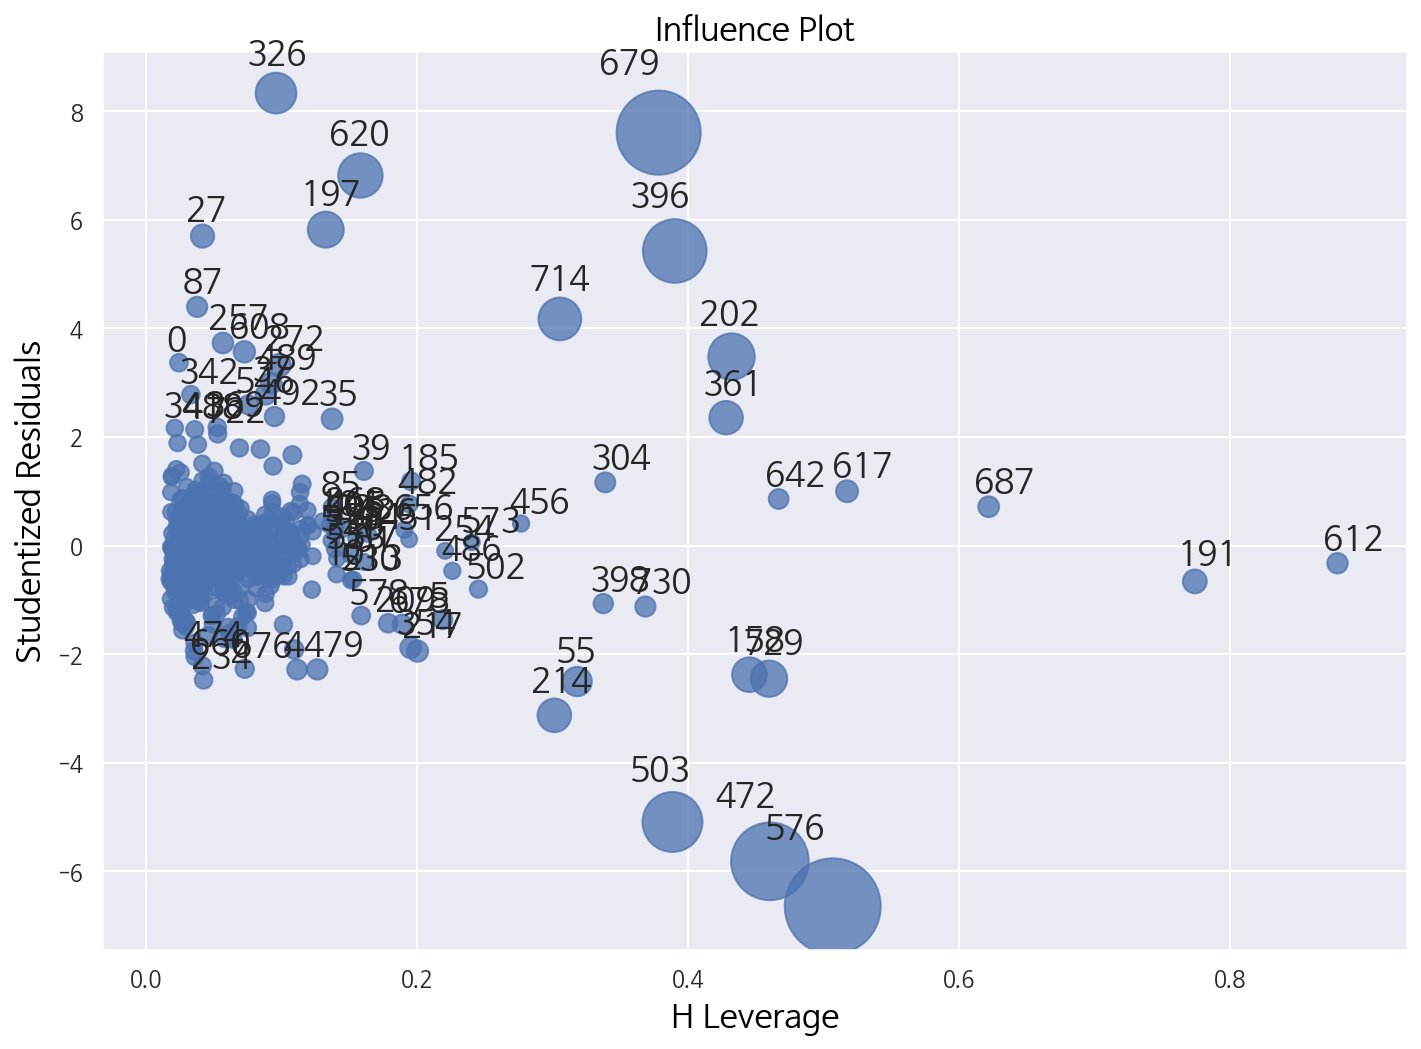

In [357]:
sm.graphics.influence_plot(result8_4, plt_alpha=0.3)
plt.show()

In [314]:
# high Leverate : 191, 576, 472, 396, 612

In [359]:
df_train0.iloc[576]

title                                   어벤져스: 엔드게임
director                               안소니 루소,조 루소
distributor                     월트디즈니컴퍼니코리아 유한책임회사
distributor_group                                B
release_date                             4/24/2019
release_season                              spring
release                                       개봉영화
form                                            장편
nation                                          미국
screen                                        2835
rev_nationwide                         1.22049e+11
rev_seoul                              33469723220
rev_seoul.1                                3585380
genre                                           액션
rate                                      12세이상관람가
type                                          일반영화
expert_rating                                 7.62
starring_actors       로버트 다우니 주니어,크리스 에반스,크리스 헴스워스
running_times                                  181
audience_rating                

In [296]:
# 576 엔드게임
df_train1=df_train0.drop([576])
len(df_train1)

739

In [360]:
model8_5 = sm.OLS.from_formula("aud_nationwide ~ scale(actor_power) + scale(director_power) + scale(rating_audiences) + scale(screen) + genre * director_power + screen * rate + scale(running_times)  + C(nation) + C(original)  + C(release_season) + C(distributor_group)", data=df_train1)
result8_5 = model8_5.fit()
print(result8_5.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     55.72
Date:                Wed, 01 Apr 2020   Prob (F-statistic):          8.32e-206
Time:                        18:04:23   Log-Likelihood:                -751.34
No. Observations:                 739   AIC:                             1603.
Df Residuals:                     689   BIC:                             1833.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [297]:
model8_5 = sm.OLS.from_formula("aud_nationwide ~ scale(actor_power) + scale(director_power) + scale(rating_audiences) + scale(screen) + genre * director_power + screen * rate + scale(running_times)  + C(nation) + C(original)  + C(release_season) + C(distributor_group)", data=df_train1)
result8_5 = model8_5.fit()
print(result8_5.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     55.72
Date:                Wed, 01 Apr 2020   Prob (F-statistic):          8.32e-206
Time:                        16:21:22   Log-Likelihood:                -751.34
No. Observations:                 739   AIC:                             1603.
Df Residuals:                     689   BIC:                             1833.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

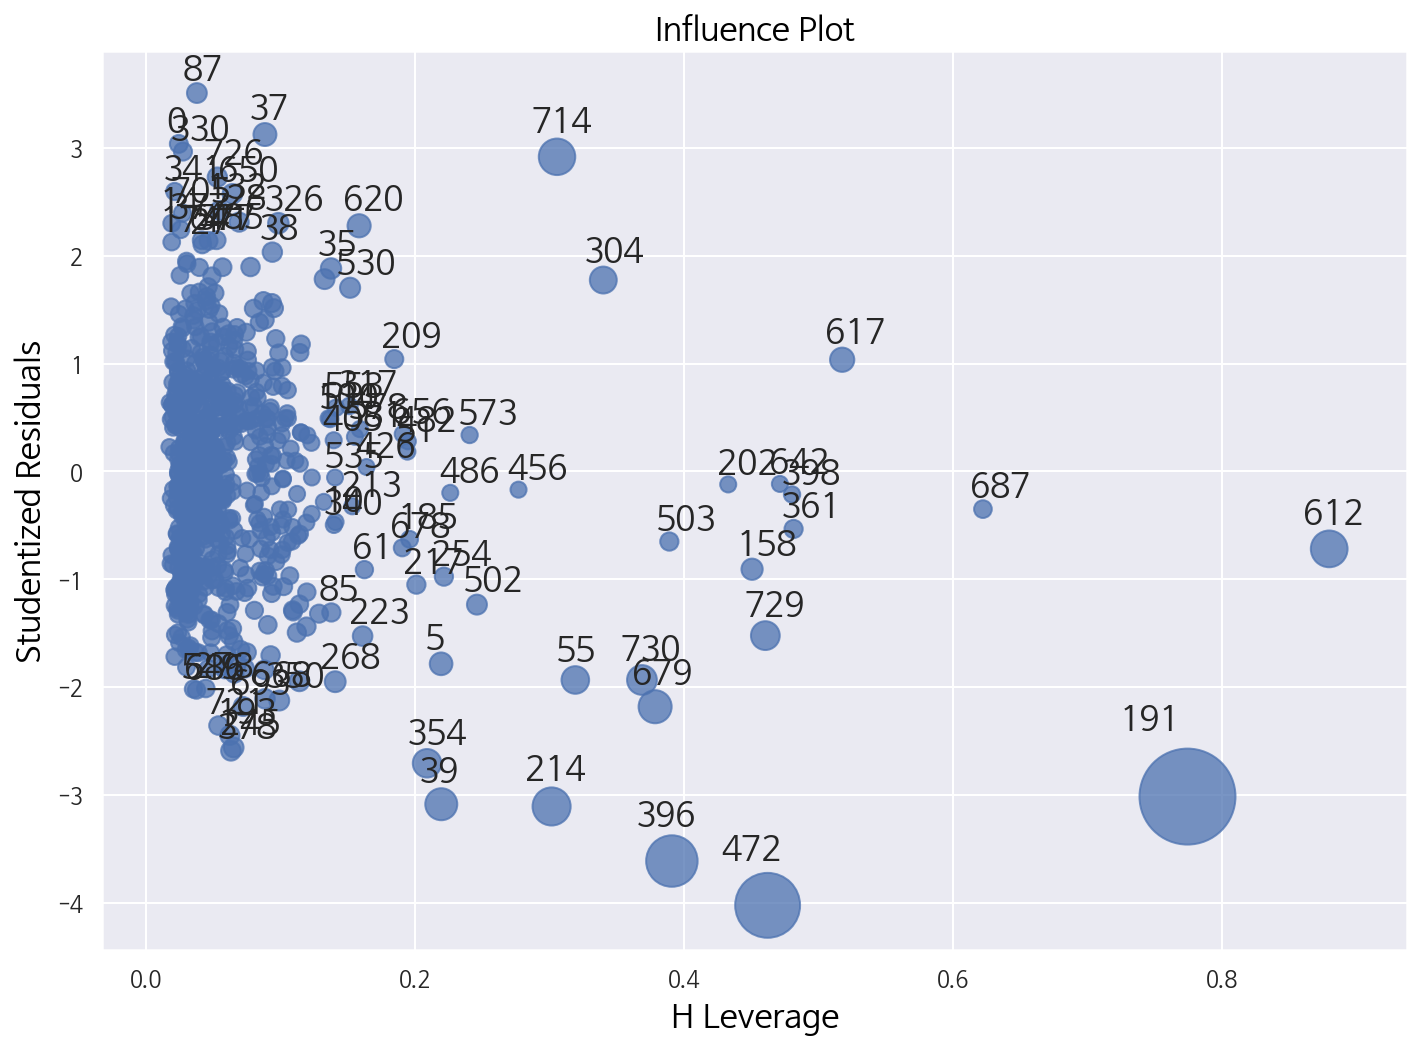

In [361]:
sm.graphics.influence_plot(result8_5, plt_alpha=0.3)
plt.show()

In [316]:
df_train0.iloc[396]

title                             겨울왕국 2
director                     크리스 벅,제니퍼 리
distributor           월트디즈니컴퍼니코리아 유한책임회사
distributor_group                      B
release_date                  11/21/2019
release_season                    autumn
release                             개봉영화
form                                  장편
nation                                미국
screen                              2648
rev_nationwide               1.11596e+11
rev_seoul                    27828512460
rev_seoul.1                      3113579
genre                              애니메이션
rate                               전체관람가
type                                일반영화
expert_rating                       6.75
starring_actors            크리스틴 벨,이디나 멘젤
running_times                        103
audience_rating                  8.95408
rating_audiences                    1764
realease_year                       2019
director_power               4.01073e+07
director_movie_num              2 [1, 1]
sequel          

In [362]:
pred8_5 =  result8_5.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "original", "rate", "release_season", "distributor_group"]])
rss8_5 = ((y_test.aud_nationwide - pred8_5) ** 2).sum()
tss8_5 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared8_5 = 1 - rss8_5/tss8_5
rsquared8_5

0.7616658264982897

In [363]:
df_train2=df_train1.drop([396])
len(df_train2)

738

In [364]:
model8_6 = sm.OLS.from_formula("aud_nationwide ~scale(director_power) + scale(actor_power) + scale(rating_audiences) + scale(screen) + genre * director_power + screen * rate + scale(running_times)  + C(nation) + C(original)  + C(release_season) + C(distributor_group)", data=df_train2)
result8_6 = model8_6.fit()
print(result8_6.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     56.39
Date:                Wed, 01 Apr 2020   Prob (F-statistic):          4.67e-207
Time:                        18:05:15   Log-Likelihood:                -743.88
No. Observations:                 738   AIC:                             1588.
Df Residuals:                     688   BIC:                             1818.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [365]:
pred8_6 =  result8_6.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "original", "rate", "release_season", "distributor_group"]])
rss8_6 = ((y_test.aud_nationwide - pred8_6) ** 2).sum()
tss8_6 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared8_6 = 1 - rss8_6/tss8_6
rsquared8_6

0.7651029473694639

In [366]:
df_drop_anni = df_train[df_train0["genre"] == "애니메이션"]

df_runnig_times_80 = df_drop_anni[df_drop_anni["running_times"] < 80]
df_runnig_times_80

C:\Users\shine\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



title     director            distributor  \
1            바다 탐험대 옥토넛 시즌4: 아슬아슬 구조대작전       다라 오코넬             와이드 릴리즈(주)   
2                 신비아파트: 금빛 도깨비와 비밀의 동굴          김병갑              씨제이이앤엠(주)   
18                바다 탐험대 옥토넛 시즌4: 더 파이널       다라 오코넬             와이드 릴리즈(주)   
124                                 매직빈         조이 주               (주)영화사 빅   
150                   극장판 뽀잉: 슈퍼 변신의 비밀          정미화     (주)이수C&E,(주)시너지미디어   
167                극장판 헬로카봇: 옴파로스 섬의 비밀      최신규,김진철    (주)넥스트엔터테인먼트월드(NEW)   
187  극장판 숲의 요정 페어리루 ~크리스마스의 기적: 마법의 날개~       고로 사쿠라  (주)이수C&E,(주)에이원엔터테인먼트   
210           바다 탐험대 옥토넛 시즌4: 바다 괴물 대소동       다라 오코넬             와이드 릴리즈(주)   
212                          극장판 안녕 자두야          손석우              씨제이이앤엠(주)   
246                극장판 프랭키와 친구들: 생명의 나무          박정오              예지림엔터테인먼트   
289                  최강전사 미니특공대: 영웅의 탄생          이영준             (주)삼지애니메이션   
315                       런닝맨 : 풀룰루의 역습          윤준상    (주)넥스트엔터테인먼트월드(NEW)   
329                     뽀로로 극장판 보물섬 대모험  김현호,윤창섭,김현호    (주)넥스트엔터테인먼트월드(NEW)   
367                  백설공주 : 사라진 아빠를 찾아서         벤 차오              예지림엔터테인먼트   
375                     뽀로로 극장판 공룡섬 대모험      김현호,윤제완    (주)넥스트엔터테인먼트월드(NEW)   
414                            킹 오브 프리즘     히시다 마사카즈            (주)박수엔터테인먼트   
417            베이블레이드 버스트 갓 : 갓 발키리의 탄생     야마구치 켄타로              씨제이이앤엠(주)   
420                               래빗 스쿨     우테 폰 뮌쇼폴              예지림엔터테인먼트   
421                         빅샤크2: 해저2만리           신우             와이드 릴리즈(주)   
455               극장판 꼬마버스 타요의 에이스 구출작전          류정우               (주)아이코닉스   
457                              미니특공대X          이영준             (주)삼지애니메이션   
507                            다이노X 탐험대          이동희               (주)이수C&E   
527              바다 탐험대 옥토넛 시즌4: 빙하탐험선S       다라 오코넬             와이드 릴리즈(주)   
545                      바다 탐험대 옥토넛 스페셜        니키 팰런             와이드 릴리즈(주)   
557                 극장판 공룡메카드: 타이니소어의 섬      최신규,유재운    (주)넥스트엔터테인먼트월드(NEW)   
564                              벅스 프렌즈          딩 스            (주)스톰픽쳐스코리아   
579               극장판 엉덩이 탐정: 화려한 사건 수첩      히라야마 미호    (주)넥스트엔터테인먼트월드(NEW)   
602             최강전사 미니특공대 : 새로운 악당의 습격          이영준              에이원엔터테인먼트   
626                          빅샤크: 매직체인지         헤 질리             와이드 릴리즈(주)   
658                  뽀로로 극장판 컴퓨터 왕국 대모험          박영균    (주)넥스트엔터테인먼트월드(NEW)   
708               킹 오브 프리즘 - 프라이드 더 히어로     히시다 마사카즈  동우에이앤이(주),(주)박수엔터테인먼트   
735      극장판 에그엔젤 코코밍: 푸르밍과 두근두근 코코밍 세계       닛타 노리오              씨제이이앤엠(주)   

    distributor_group release_date release_season release form nation  screen  \
1                   D     6/2/2016         summer    개봉영화   장편     영국     162   
2                   A    7/25/2018         summer    개봉영화   장편     한국     762   
18                  D     6/1/2017         summer    개봉영화   장편     영국     167   
124                 D     5/3/2018         spring    개봉영화   장편     기타     534   
150                 B    9/20/2018         autumn    개봉영화   장편     한국     294   
167                 C    1/31/2019         winter    개봉영화   장편     한국     752   
187                 B   12/14/2017         winter    개봉영화   장편     일본     207   
210                 D    1/25/2017         winter    개봉영화   장편     영국     145   
212                 A     5/4/2016         spring    개봉영화   장편     한국     523   
246                 D    4/13/2016         spring    개봉영화   장편     한국     258   
289                 D     2/4/2016         winter    개봉영화   장편     한국     349   
315                 C    12/5/2018         winter    개봉영화   장편     한국     511   
329                 C    4/25/2019         spring    개봉영화   장편     한국     736   
367                 D    9/29/2016         autumn    개봉영화   장편     기타     213   
375                 C    12/7/2017         winter    개봉영화   장편     한국     803   
414                 D    8/11/2016         summer    개봉영화   장편     일본      53   
417                 A     6/1/2017         summer

C:\Users\shine\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



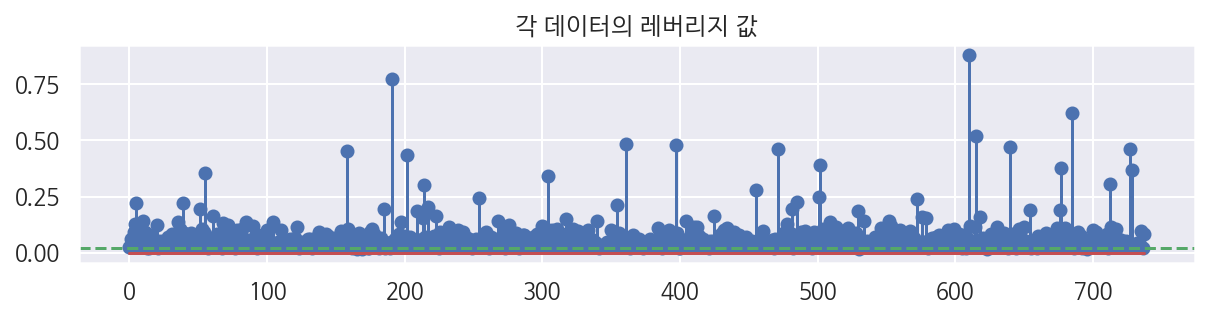

In [368]:
influence = result8_6.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.axhline(0.02, c="g", ls="--")
plt.title("각 데이터의 레버리지 값")
plt.show()

In [369]:
hat.sum()

49.999999985636826

C:\Users\shine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



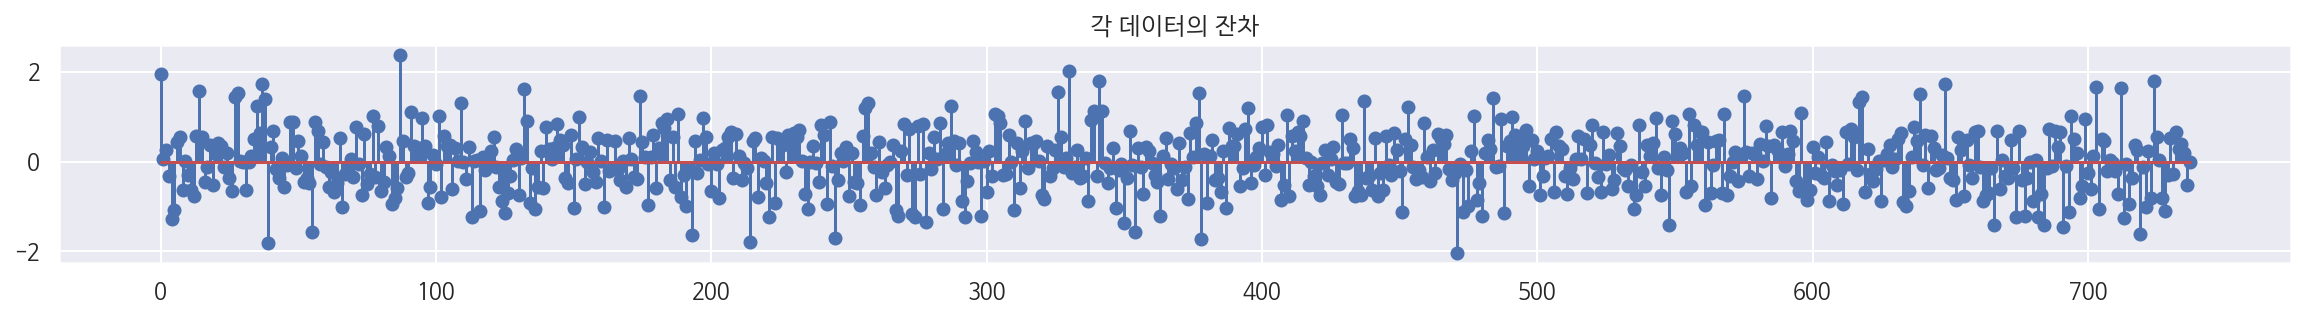

In [370]:
plt.figure(figsize=(20, 2))
plt.stem(result8_6.resid)
plt.title("각 데이터의 잔차")
plt.show()

C:\Users\shine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



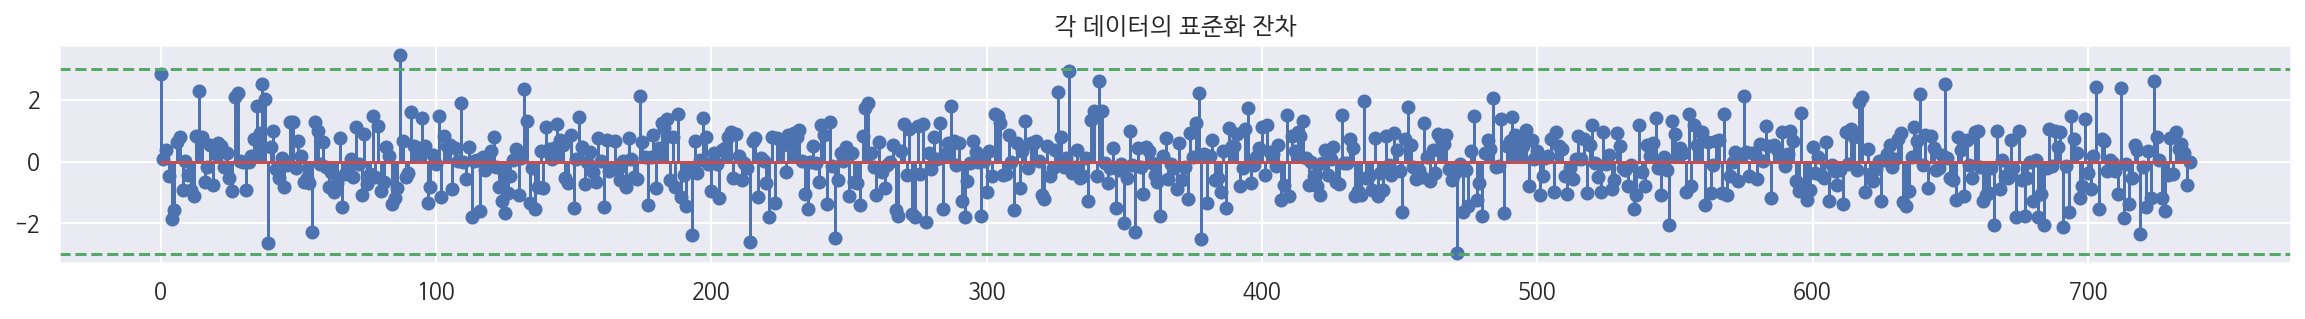

In [371]:
plt.figure(figsize=(20, 2))
plt.stem(result8_6.resid_pearson)
plt.axhline(3, c='g', ls='--')
plt.axhline(-3, c='g', ls='--')
plt.title("각 데이터의 표준화 잔차")
plt.show()

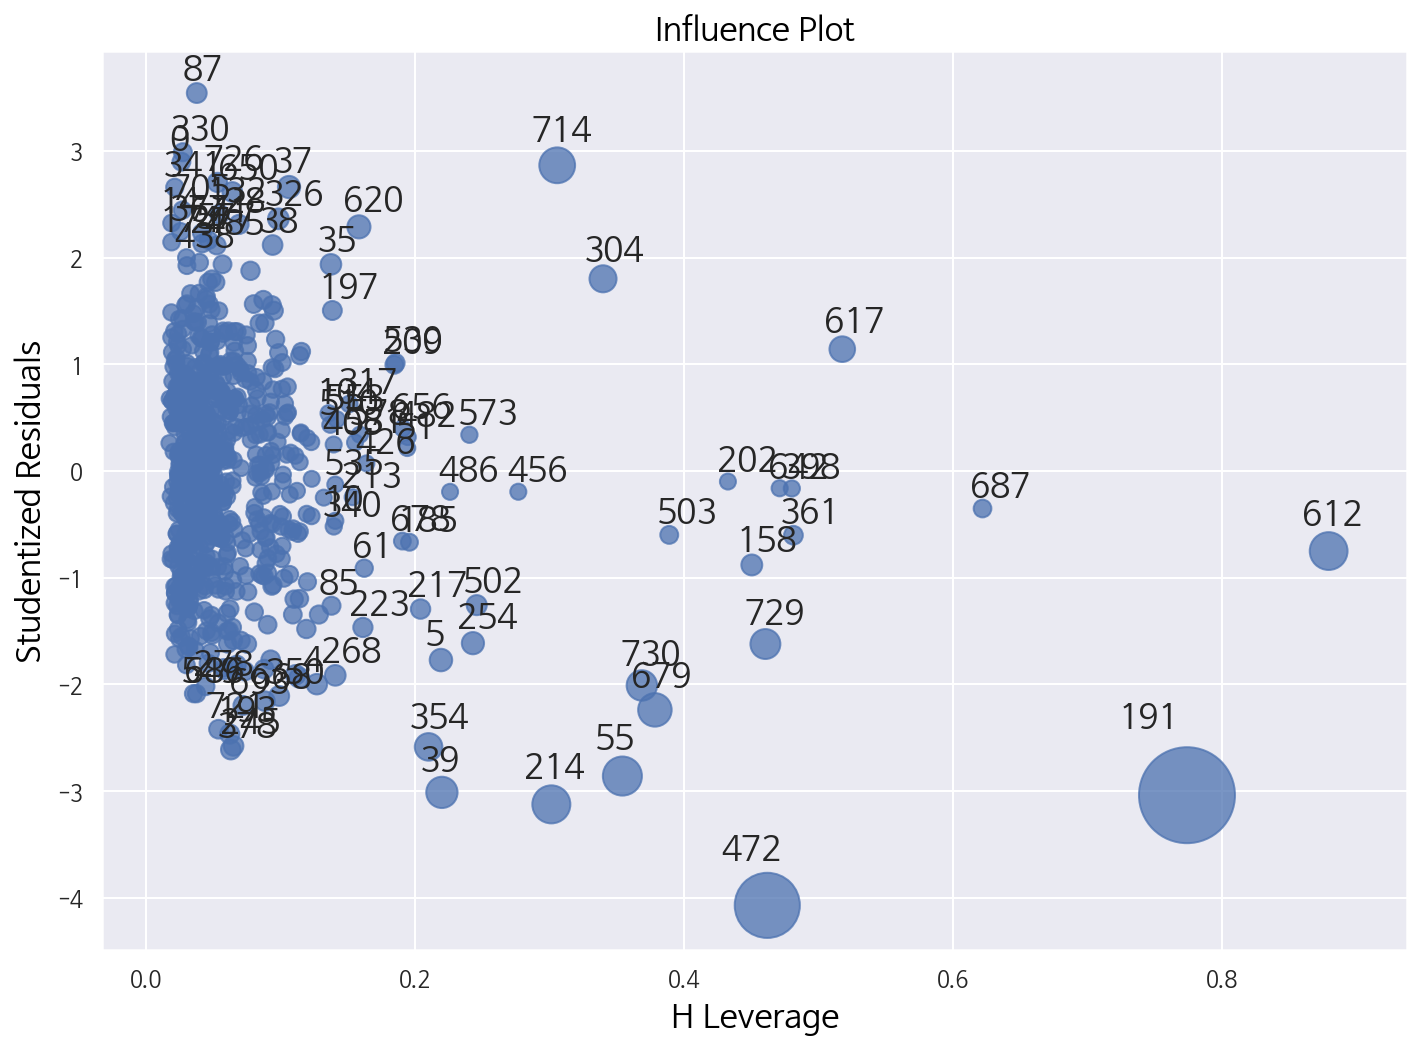

In [372]:
sm.graphics.influence_plot(result8_6, plt_alpha=0.3)
plt.show()

In [375]:
df_train2.iloc[472]

title                 세상에서 고양이가 사라진다면
director                      나가이 아키라
distributor                  (주)크리픽쳐스
distributor_group                   D
release_date                11/9/2016
release_season                 autumn
release                          개봉영화
form                               장편
nation                             일본
screen                            175
rev_nationwide            4.97645e+08
rev_seoul                   183328500
rev_seoul.1                     24986
genre                             드라마
rate                         12세이상관람가
type                          독립/예술영화
expert_rating                     5.9
starring_actors       사토 타케루,미야자키 아오이
running_times                     103
audience_rating               9.46667
rating_audiences                   15
realease_year                    2016
director_power                  69586
director_movie_num              1 [1]
sequel                              1
original                            0
actor_power 

In [377]:
import scipy as sp

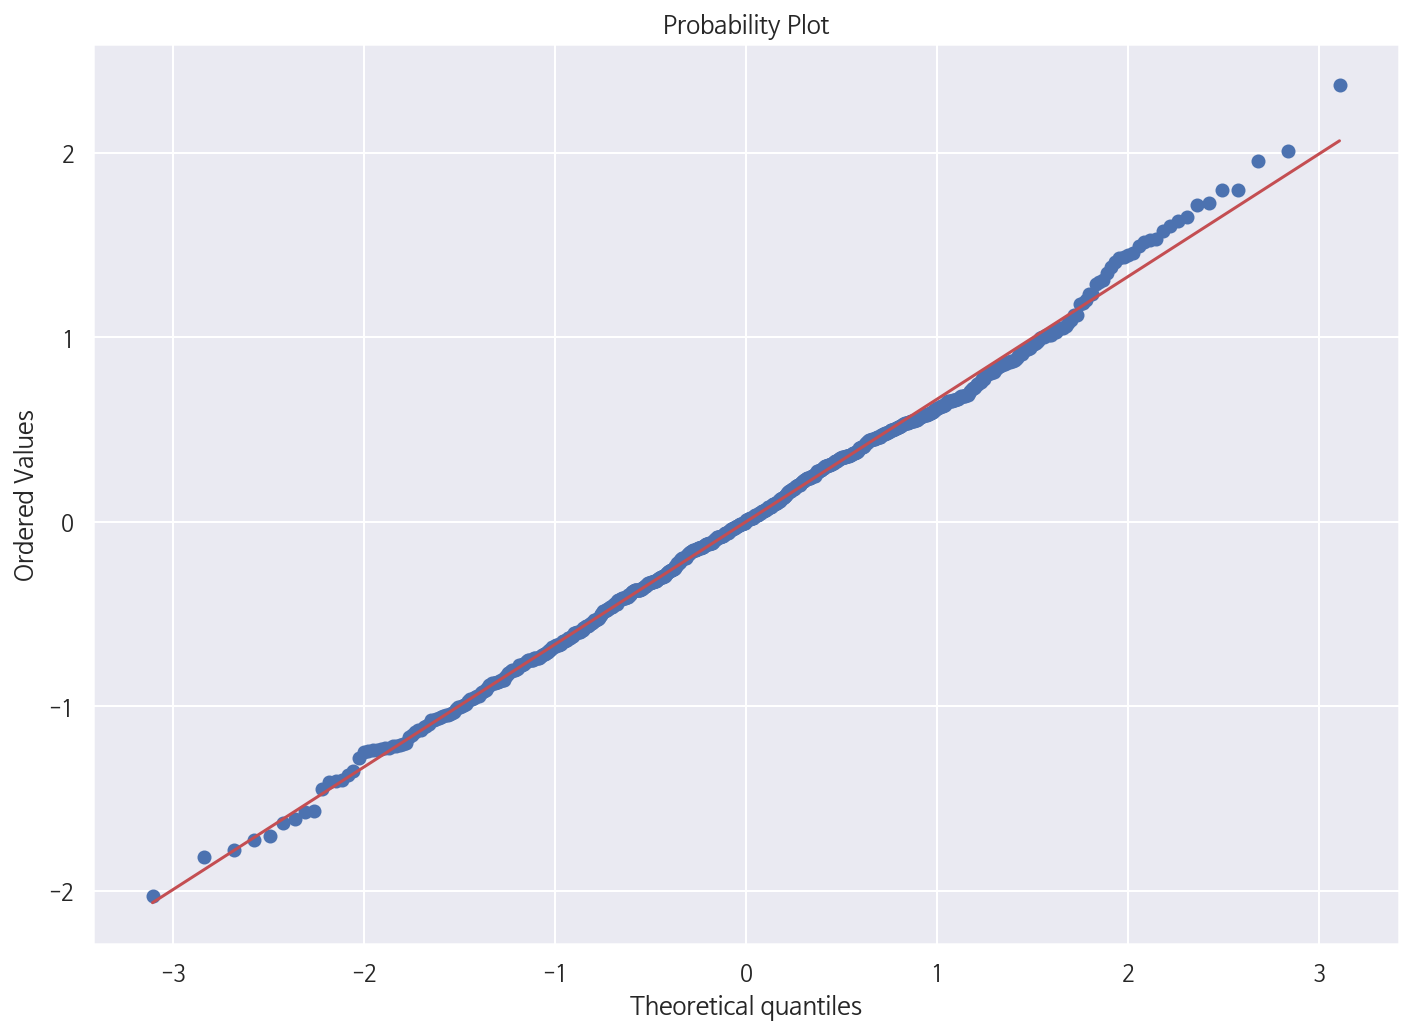

In [378]:
sp.stats.probplot(result8_6.resid, plot=plt)
plt.show()

### Train - KFold validation - Test r-squared

In [109]:
df_train0 = pd.concat([X_train, y_train], axis=1)

In [58]:
from sklearn.model_selection import KFold
scores = np.zeros(5)
ls_ols = []
cv = KFold(5, shuffle = True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_train0)):
    df_train = df_train0.iloc[idx_train]
    df_test = df_train0.iloc[idx_test]
    
    model9 = sm.OLS.from_formula("aud_nationwide ~ scale(actor_power) + scale(director_power) + scale(rating_audiences) + scale(screen) + scale(expert_rating) + scale(audience_rating) + scale(running_times) + C(genre) + C(nation) + C(original)", data=df_train)
    result9 = model9.fit()
    
    pred9 = result9.predict(df_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "original"]])
    rss9 = ((df_test.aud_nationwide - pred8) ** 2).sum()
    tss9 = ((df_test.aud_nationwide - df_test.aud_nationwide.mean())** 2).sum()
    rsquared9 = 1 - rss9 / tss9
    
    scores[i] = rsquared9
    print("학습 R2 = {:.8}, 검증 R2 = {:.8F}".format(result9.rsquared, rsquared9))
    ls_ols.append({
        "cv" : i,
        "train_r2" : result9.rsquared,
        "test_r2" : rsquared9,
        "model" : result9
    })

학습 R2 = 0.74113881, 검증 R2 = 1.00000000
학습 R2 = 0.75431578, 검증 R2 = 1.00000000
학습 R2 = 0.737128, 검증 R2 = 1.00000000
학습 R2 = 0.76418188, 검증 R2 = 1.00000000
학습 R2 = 0.74725423, 검증 R2 = 0.72335166


In [59]:
df_ols = pd.DataFrame(ls_ols)
df_ols

cv  train_r2   test_r2                                              model
0   0  0.741139  1.000000  <statsmodels.regression.linear_model.Regressio...
1   1  0.754316  1.000000  <statsmodels.regression.linear_model.Regressio...
2   2  0.737128  1.000000  <statsmodels.regression.linear_model.Regressio...
3   3  0.764182  1.000000  <statsmodels.regression.linear_model.Regressio...
4   4  0.747254  0.723352  <statsmodels.regression.linear_model.Regressio...

In [60]:
df_ols["model"][0].predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "original"]])

rss9 = ((y_test.aud_nationwide -  pred9) ** 2).sum()
tss9 = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared9 = 1 - rss9/tss9
rsquared9

0.6531856370407447

{'whiskers': [<matplotlib.lines.Line2D at 0x1b131ce1508>,
 'caps': [<matplotlib.lines.Line2D at 0x1b131ceca48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b131c00088>],
 'medians': [<matplotlib.lines.Line2D at 0x1b131cf4c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b131cf4e88>],
 'means': []}

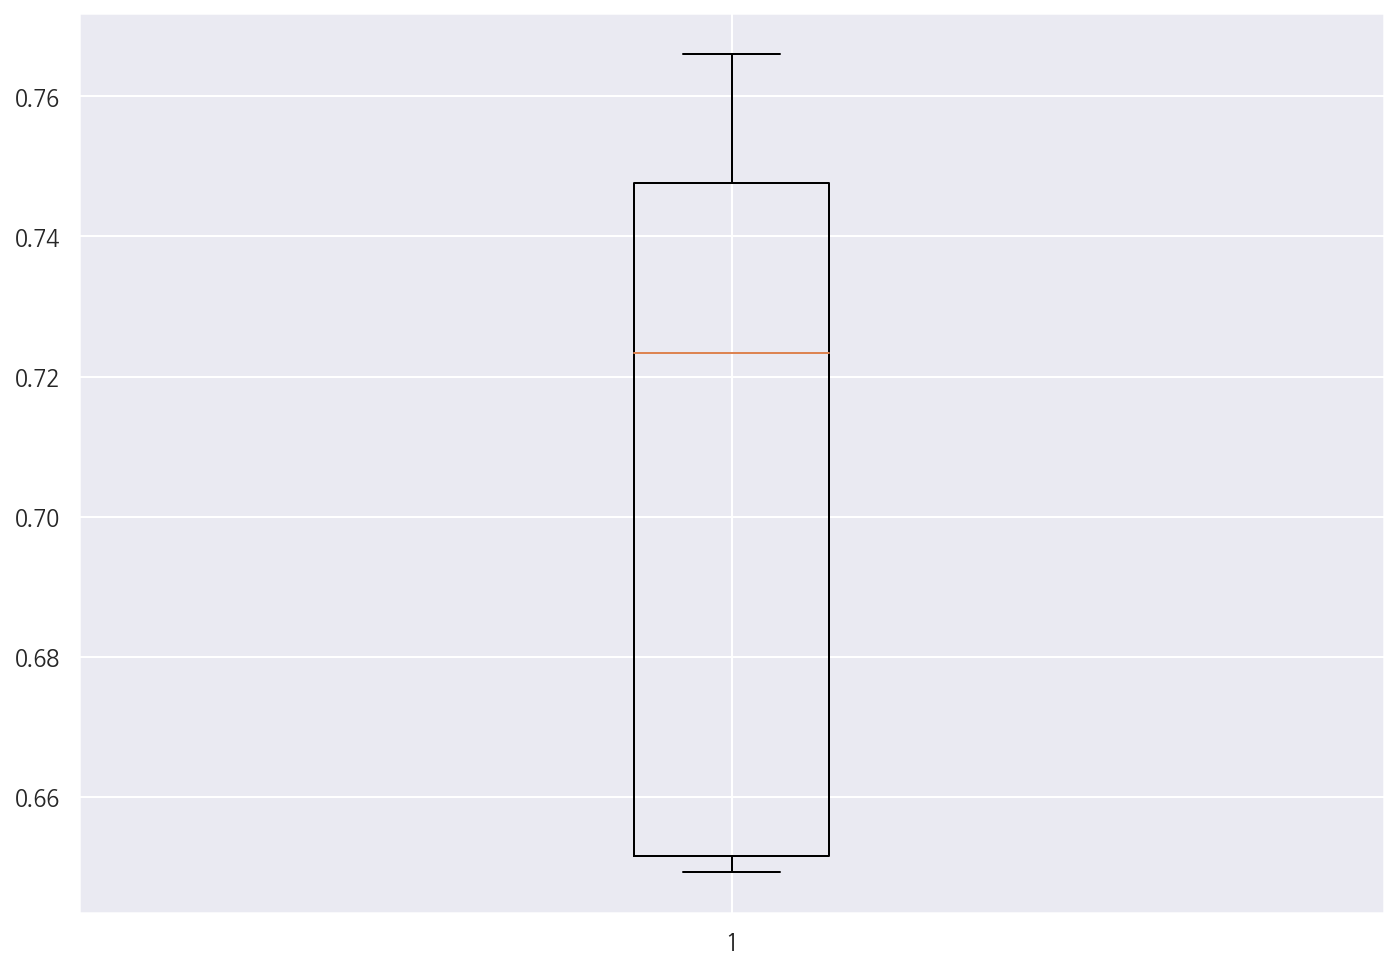

In [32]:
plt.boxplot([0.7477, 0.6516, 0.766, 0.6493, 0.7233])